<a href="https://colab.research.google.com/github/fabriziobasso/kaggle/blob/main/S4E1_EDA_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **S4E1 BANK CHURN**

##### About Dataset
The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be a customer. The dataset includes the following attributes:

* Customer ID: A unique identifier for each customer
* Surname: The customer's surname or last name
* Credit Score: A numerical value representing the customer's credit score
* Geography: The country where the customer resides (France, Spain or Germany)
* Gender: The customer's gender (Male or Female)
* Age: The customer's age.
* Tenure: The number of years the customer has been with the bank
* Balance: The customer's account balance
* NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
* HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
* IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
* EstimatedSalary: The estimated salary of the customer
* Exited: Whether the customer has churned (1 = yes, 0 = no)

##### Evaluation
Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.


The submitted probabilities for a given row are not required to sum to one because they are rescaled prior to being scored (each row is divided by the row sum). In order to avoid the extremes of the log function, predicted probabilities are replaced with
.

#### **Files:**
* train.csv - the training dataset; Hardness is the continuous target
* test.csv - the test dataset; your objective is to predict the value of Hardness
* sample_submission.csv - a sample submission file in the correct format
* Churn_Modelling.csv - Original Dataset

## 1.0 Workbook Set-up and Libraries:

#### 1.0 Libraries

In [1]:
%%capture
!pip install tensorflow-addons
#!pip install shap
#!pip install eli5
#!pip install tf-nightly
#!pip install -U scikit-learn==1.2.0
!pip install catboost
#!pip install haversine
#!pip install pytorch-forecasting
!pip install umap-learn
#!pip install reverse_geocoder
#!pip install --upgrade protobuf
!pip install colorama
!pip install imbalanced-learn
!pip install optuna
!pip install optuna-integration
#!pip install pygam
!pip install keras-tuner --upgrade
#!pip install pycaret
#!pip install lightning==2.0.1
!pip install keras-nlp
#!pip install MiniSom
!pip install BorutaShap

In [2]:
#importing modules

import warnings
warnings.filterwarnings('ignore')
import time
t = time.time()

print('Importing started...')

# basic moduele
import os
import numpy as np
import pandas as pd
import re
#from scipy import stats
from random import randint
import random
import math
import os
import gc
import pickle
from glob import glob
from IPython import display as ipd
from tqdm import tqdm
from datetime import datetime
from joblib import dump, load
import sklearn as sk
from imblearn.over_sampling import SMOTE, RandomOverSampler
from functools import partial
import itertools
import joblib
from itertools import combinations
import IPython
import statsmodels.api as sm
import IPython.display
from prettytable import PrettyTable

# visualization moduels
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib_venn import venn2_unweighted
import seaborn as sns
import missingno as msno
import imblearn
import scipy.stats as stats
from scipy.special import boxcox, boxcox1p


# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
#sns.set_theme(style="ticks", context="notebook")
sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# Style Import
from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

# preprocessing modules
from sklearn.model_selection import (train_test_split,
                                     KFold,
                                     StratifiedKFold,
                                     cross_val_score,
                                     GroupKFold,
                                     GridSearchCV,
                                     RepeatedStratifiedKFold)

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   LabelEncoder,
                                   OrdinalEncoder,
                                   QuantileTransformer,
                                   PolynomialFeatures)

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# metrics
from sklearn.metrics import (mean_squared_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss)


# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  TweedieRegressor,
                                  ARDRegression,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.isotonic import IsotonicRegression

from sklearn.ensemble import (AdaBoostRegressor,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              GradientBoostingClassifier,
                              StackingRegressor,
                              HistGradientBoostingClassifier,
                              ExtraTreesClassifier)

from sklearn.base import BaseEstimator, TransformerMixin

# Other Models
#from pygam import LogisticGAM, s, te
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

#import catboost as cat
from catboost import CatBoost, CatBoostRegressor
from catboost import CatBoostClassifier

#from catboost.utils import get_roc_curve

from lightgbm import early_stopping
# check installed version
#import pycaret
warnings.filterwarnings("ignore")
#from minisom import MiniSom

from sklearn.base import clone ## sklearn base models for stacked ensemble model
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

#Interpretiability of the model
#import shap
#import eli5
#from eli5.sklearn import PermutationImportance


## miss
from sklearn.pipeline import (make_pipeline,
                              Pipeline)


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.backend as K
import tensorflow_addons as tfa
from keras.utils import FeatureSpace
import keras_nlp

# Import libraries for Hypertuning
import kerastuner as kt
from kerastuner.tuners import RandomSearch, GridSearch, BayesianOptimization
# Model Tuning tools:
import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour
# Feature selection
from BorutaShap import BorutaShap
%matplotlib inline
SEED = 1984
N_SPLITS = 10

print('Done, All the required modules are imported. Time elapsed: {} sec'.format(time.time()-t))

Importing started...
Using TensorFlow backend
Done, All the required modules are imported. Time elapsed: 15.366366624832153 sec


<Figure size 640x480 with 0 Axes>

In [3]:
# Check Versions:
print("CHECK VERSIONS:")
print(f"sns: {sns.__version__}")
print(f"mpl: {mpl.__version__}")
print(f"tensorflow: {tf.__version__}")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"scikit-learn: {sk.__version__}")
print(f"statsmodels: {sm.__version__}")
print(f"missingno: {msno.__version__}")
#print(f"TF-addon: {tfa.__version__}")
print(f"Inbalance_Learning: {imblearn.__version__}")
print(f"XGBoost: {xgb.__version__}")
#print(f"CatBoost: {cat.__version__}")
#print(f"PyCaret: {pycaret.__version__}")

CHECK VERSIONS:
sns: 0.12.2
mpl: 3.7.1
tensorflow: 2.15.0
pandas: 1.5.3
numpy: 1.23.5
scikit-learn: 1.2.2
statsmodels: 0.14.1
missingno: 0.5.2
Inbalance_Learning: 0.10.1
XGBoost: 2.0.3


In [4]:
def seed_everything(seed,
                    tensorflow_init=True,
                    pytorch_init=True):
    """
    Seeds basic parameters for reproducibility of results
    """
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    if tensorflow_init is True:
        tf.random.set_seed(seed)
    if pytorch_init is True:
        torch.manual_seed(seed)
        torch.cuda.manual_seed(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False


seed_everything(42,tensorflow_init=True,pytorch_init=False)

### **1.1 Utility Functions**

#### Graph Functions:

In [5]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['%missing'] = df.isnull().sum().values / len(df)* 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['median'] = desc['50%'].values
    return summ


def scatter_plot_high_corr_pair(data_set=None, target=None, variable_pairs=None):
    num_pairs = len(variable_pairs)

    num_rows = (num_pairs + 2) // 3
    num_cols = min(num_pairs, 3)

    fig = plt.figure(figsize=(15, 5 * num_rows))
    spec = gridspec.GridSpec(num_rows, num_cols, width_ratios=[1]*num_cols, height_ratios=[1]*num_rows)

    for i, pair in enumerate(variable_pairs):
        x_var, y_var = pair
        row_index = i // 3
        col_index = i % 3

        ax = plt.subplot(spec[row_index, col_index])

        sns.scatterplot(x=x_var, y=y_var, hue=target, data=data_set, palette='viridis', ax=ax, s=10)
        sns.regplot(x=x_var, y=y_var, data=data_set, scatter=False, color='#FA7F6F', ax=ax)

        ax.set_title(f'{x_var} vs {y_var}')
        ax.set_xlabel(x_var)
        ax.set_ylabel(y_var)

    plt.tight_layout()
    plt.show()

def scatter_corr_plot(data_set=None, variables=None, target=None):
    if data_set is None or variables is None or target is None:
        raise ValueError("Please provide data_set and variables.")

    target = target

    full_features = data_set.columns.tolist()
    num_var = [column for column in data_set.columns if data_set[column].nunique() > 10]
    cat_var = [column for column in data_set.columns if data_set[column].nunique() < 10]


    num_rows = len(num_var)
    num_cols = 3

    total_plots = num_rows*num_cols
    plt.figure(figsize=(14,num_rows*2.5))

    for idx, col in enumerate(num_var):
        plt.subplot(num_rows, num_cols, idx % total_plots + 1)
        sns.scatterplot(x=col, y=target, data=data_set, color='#82B0D2',s=10)

        sns.regplot(x=col, y=target, data=data_set, scatter=False, color='#FA7F6F')

        corr_coef = data_set[target].corr(data_set[col])
        plt.text(0.95, 0.95, f"Corr: {corr_coef:.2f}", transform=plt.gca().transAxes, ha='right', va='top')
        mean_value = data_set[col].mean()

        plt.axvline(x=mean_value, color='black', linestyle='--', linewidth=1, label='Mean Value')
        plt.title(f"{col} : {target}")

    plt.tight_layout()
    plt.show()

def correlation_plot(data_train=None, data_test=None, variables=None):
    if data_train is None or data_test is None or variables is None:
        raise ValueError("Please provide data_train, data_test and variables.")
    corr_matrix_train = data_train[variables].corr()
    corr_matrix_test = data_test[variables].corr()

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 10), gridspec_kw={'width_ratios': [0.80, 1.0]})
    sns.heatmap(corr_matrix_train, annot=True, cmap=palette_1, fmt='.2f', linewidths=1, square=True, annot_kws={"size": 9}, ax=axes[0], cbar = False)
    axes[0].set_title('Train Set', fontsize=15)

    sns.heatmap(corr_matrix_test, annot=True, cmap=palette_1, fmt='.2f', linewidths=1, square=True, annot_kws={"size": 9}, ax=axes[1], yticklabels=False, cbar = True, cbar_kws={"shrink": .50})
    axes[1].set_title('Test Set', fontsize=15)

    plt.suptitle('Correlation Matrices of Train and Test Sets', fontsize=25, weight = 'bold',y=0.9)
    for ax in axes:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
    plt.subplots_adjust(top=1)
    plt.tight_layout()
    plt.show()

def scatter_plot_high_corr_pair(data_set=None, target=None, variable_pairs=None):
    num_pairs = len(variable_pairs)

    num_rows = (num_pairs + 2) // 3
    num_cols = min(num_pairs, 3)

    fig = plt.figure(figsize=(10, 3.5 * num_rows))
    spec = gridspec.GridSpec(num_rows, num_cols, width_ratios=[1]*num_cols, height_ratios=[1]*num_rows)

    for i, pair in enumerate(variable_pairs):
        x_var, y_var = pair
        row_index = i // 3
        col_index = i % 3

        ax = plt.subplot(spec[row_index, col_index])

        sns.scatterplot(x=x_var, y=y_var, hue=target, data=data_set, palette="viridis", ax=ax, s=10)
        sns.regplot(x=x_var, y=y_var, data=data_set, scatter=False, color='#FA7F6F', ax=ax)

        ax.set_title(f'{x_var} vs {y_var}', fontsize=10)
        ax.set_xlabel(x_var, fontsize=7)
        ax.set_ylabel(y_var, fontsize=7)

    plt.tight_layout()
    plt.show()

def plot_boxplot_and_hist(data, variable):
   #figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
   f, (ax_box, ax_hist) = plt.subplots( 2, 1, sharex =False, gridspec_kw ={"height_ratios": (0.50, 0.85)}, figsize=(8,4))
   # assigning a graph to each ax
   sns.boxplot( x = data[variable], ax = ax_box)
   sns.histplot( data = data, x = variable, ax = ax_hist, bins=40)
   # Remove x axis name for the boxplot
   ax_box.set( xlabel ='')
   ax_box.set_title(variable)
   plt.tight_layout()


def diagnostic_plots( df, variable):
  plt.figure( figsize =(8,3))
  plt.subplot( 1, 2, 1)
  df[variable].hist( bins = 30)
  plt.title( f" Histogram of {variable}")
  plt.subplot( 1, 2, 2)
  stats.probplot( df[ variable], dist ="norm", plot = plt)
  plt.title( f" Q-Q plot of {variable}")
  plt.show()
  plt.tight_layout()

def plot_confusion_matrix(y_true, y_pred, labels):
    """
    This function plots:
        1. Confusion matrix
        2. Precision matrix
        3. Recall matrix

    Parameters
    ----------
    `y_true`: ground truth (or actual) values
    `y_pred`: predicted values
    `labels`: integer encoded target values

    Returns none.
    """
    cmat = confusion_matrix(y_true=y_true, y_pred=y_pred, labels=labels)
    pmat = cmat / cmat.sum(axis=0)
    print("Column sum of precision matrix: {}".format(pmat.sum(axis=0)))
    rmat = ((cmat.T) / (cmat.sum(axis=1).T)).T
    print("Row sum of recall matrix:       {}".format(rmat.sum(axis=1)))

    plt.figure(figsize=(15, 3))
    plt.subplot(131)
    plot_heatmap(matrix=cmat, title='Confusion Matrix', labels=labels)
    plt.subplot(132)
    plot_heatmap(matrix=pmat, title='Precision Matrix', labels=labels)
    plt.subplot(133)
    plot_heatmap(matrix=rmat, title='Recall Matrix', labels=labels)
    plt.show()

def plot_heatmap(matrix, title, labels):
    """
    This function plots the heatmap.

    Parameters
    ----------
    `matrix`: 2D array
    `title`: title
    `labels`: integer encoded target values

    Returns none.
    """
    sns.heatmap(data=matrix, annot=True, fmt='.2f', linewidths=0.1,
                xticklabels=labels, yticklabels=labels)
    plt.xlabel(xlabel='Predicted Class')
    plt.ylabel(ylabel='Actual Class')
    plt.title(label=title, fontsize=10)

#### Data Analysis Functions

In [6]:
def adversarial_validation(data_train, data_test, target='Hardness',is_train_test="True"):

    adv_train = data_train.drop(target, axis = 1)
    adv_test = data_test.copy()
    if is_train_test==False:
      adv_test = adv_test.drop(target, axis = 1)

    adv_train['is_test'] = 0
    adv_test['is_test'] = 1
    adv = pd.concat([adv_train, adv_test], ignore_index = True)
    adv_shuffled = adv.sample(frac = 1)

    adv_X = adv_shuffled.drop('is_test', axis = 1)
    adv_y = adv_shuffled['is_test']

    skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)

    val_scores = []
    predictions = np.zeros(len(adv))

    for fold, (train_idx, val_idx) in enumerate(skf.split(adv_X, adv_y)):
        adv_lr = XGBClassifier(random_state = 42)
        adv_lr.fit(adv_X.iloc[train_idx], adv_y.iloc[train_idx])

        val_preds = adv_lr.predict_proba(adv_X.iloc[val_idx])[:,1]
        predictions[val_idx] = val_preds
        val_score = roc_auc_score(adv_y.iloc[val_idx], val_preds)
        val_scores.append(val_score)

    fpr, tpr, _ = roc_curve(adv['is_test'], predictions)

    plt.figure(figsize = (6, 6))
    sns.lineplot(x=[0, 1], y=[0, 1], linestyle="--", label="Indistinguishable Datasets")
    sns.lineplot(x=fpr, y=tpr, label="Adversarial Validation Classifier")
    plt.title(f'Train-Test Validation = {np.mean(val_scores):.5f}', weight = 'bold', size = 17)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

def search_high_corr_pairs(data_set = None, variables =None, threshold = 0.7):
    corr_matrix=data_set[variables].corr()
    high_corr_pairs=[]

    for i in range(len(corr_matrix.columns)):
        for j in range(i+1,len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                print(f'\033[91m{corr_matrix.columns[i]}\033[0m and \033[91m{corr_matrix.columns[j]}\033[0m are highly linearly correlated, indicating the possibility of collinearity.')
                high_corr_pairs.append((corr_matrix.columns[i],corr_matrix.columns[j]))
    return high_corr_pairs


def transform_features(train,test):
  train_ = train.copy()
  test_ = test.copy()

  feat_log_transf = ["allelectrons_Total","density_Total","allelectrons_Average","atomicweight_Average",
                     "ionenergy_Average","zaratio_Average","density_Average"]

  feat_power_transf = ["val_e_Average","R_vdw_element_Average","el_neg_chi_Average"]

  log_transformer = FunctionTransformer(lambda x: np.log(x+1.0))
  power_transformer = FunctionTransformer(lambda x: np.power(x,2.0))

  for feat in feat_log_transf:
    train_[feat] = log_transformer.transform(train_[feat])
    test_[feat] = log_transformer.transform(test_[feat])

  for feat in feat_power_transf:
    train_[feat] = power_transformer.transform(train_[feat])
    test_[feat] = power_transformer.transform(test_[feat])

  return train_, test_


def replace_zeros(train,test):
  train_ = train.copy()
  test_ = test.copy()

  train_.replace({0:np.nan},inplace=True)
  test_.replace({0:np.nan},inplace=True)

  train_["nan_marker"] = train_.isna().any(axis=1).astype("int")
  test_["nan_marker"] = test_.isna().any(axis=1).astype("int")

  total = pd.concat([train_, test_], ignore_index=True)
  total.drop("Hardness",axis=1,inplace=True)

  total_col = list(total.columns)

  imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=50, random_state = 0)
  imputer.fit(total[total_col])
  train_[total_col] = imputer.transform(train_[total_col])
  test_[total_col] = imputer.transform(test_[total_col])

  return train_, test_

def clip_values(train,test):
  train_ = train.copy()
  test_ = test.copy()

  train_["allelectrons_Total"] = train_["allelectrons_Total"].clip(lower=1.9, upper=None, axis=None, inplace=False)
  test_["allelectrons_Total"] = test_["allelectrons_Total"].clip(lower=1.9, upper=None, axis=None, inplace=False)

  train_["allelectrons_Average"] = train_["allelectrons_Average"].clip(lower=1.7, upper=None, axis=None, inplace=False)
  test_["allelectrons_Average"] = test_["allelectrons_Average"].clip(lower=1.7, upper=None, axis=None, inplace=False)

  train_["val_e_Average"] = train_["val_e_Average"].clip(lower=2.0, upper=None, axis=None, inplace=False)
  test_["val_e_Average"] = test_["val_e_Average"].clip(lower=2.0, upper=None, axis=None, inplace=False)

  train_["atomicweight_Average"] = train_["atomicweight_Average"].clip(lower=2.0, upper=None, axis=None, inplace=False)
  test_["atomicweight_Average"] = test_["atomicweight_Average"].clip(lower=2.0, upper=None, axis=None, inplace=False)

  train_["density_Total"] = train_["density_Total"].clip(lower=0.01, upper=None, axis=None, inplace=False)
  test_["density_Total"] = test_["density_Total"].clip(lower=0.01, upper=None, axis=None, inplace=False)

  train_["el_neg_chi_Average"] = train_["el_neg_chi_Average"].clip(lower=1.0, upper=None, axis=None, inplace=False)
  test_["el_neg_chi_Average"] = test_["el_neg_chi_Average"].clip(lower=1.0, upper=None, axis=None, inplace=False)

  train_["R_vdw_element_Average"] = train_["R_vdw_element_Average"].clip(lower=1.2, upper=None, axis=None, inplace=False)
  test_["R_vdw_element_Average"] = test_["R_vdw_element_Average"].clip(lower=1.2, upper=None, axis=None, inplace=False)

  train_["R_cov_element_Average"] = train_["R_cov_element_Average"].clip(lower=0.2,upper=2.0,axis=None,inplace=False)
  test_["R_cov_element_Average"] = test_["R_cov_element_Average"].clip(lower=0.2,upper=2.0,axis=None,inplace=False)

  train_["zaratio_Average"] = train_["zaratio_Average"].clip(lower=0.3,upper=0.60, axis=None, inplace=False)
  test_["zaratio_Average"] = test_["zaratio_Average"].clip(lower=0.3,upper=0.60, axis=None, inplace=False)

  train_["density_Average"] = train_["density_Average"].clip(lower=0.01,upper=None, axis=None, inplace=False)
  test_["density_Average"] = test_["density_Average"].clip(lower=0.01,upper=None, axis=None, inplace=False)

  train_["ionenergy_Average"] = train_["ionenergy_Average"].clip(lower=2.1,upper=None, axis=None, inplace=False)
  test_["ionenergy_Average"] = test_["ionenergy_Average"].clip(lower=2.1,upper=None, axis=None, inplace=False)


  return train_, test_

def fill_missing_numerical(train,test,target, max_iterations=10):
    '''Iterative Missing Imputer: Updates filled missing values iteratively using LGBMRegressor Algorithm'''
    train_temp=train.copy()
    if target in train_temp.columns:
        train_temp=train_temp.drop(columns=target)


    df=pd.concat([train_temp,test],axis="rows")
    df=df.reset_index(drop=True)
    features=[f for f in df.columns if df[f].isna().sum()>0]
    if len(features)>0:
        # Step 1: Store the instances with missing values in each feature
        missing_rows = store_missing_rows(df, features)

        # Step 2: Initially fill all missing values with "Missing"
        for f in features:
            df[f]=df[f].fillna(df[f].mean())

        cat_features=[f for f in df.columns if not pd.api.types.is_numeric_dtype(df[f])]
        dictionary = {feature: [] for feature in features}

        for iteration in tqdm(range(max_iterations), desc="Iterations"):
            for feature in features:
                # Skip features with no missing values
                rows_miss = missing_rows[feature].index

                missing_temp = df.loc[rows_miss].copy()
                non_missing_temp = df.drop(index=rows_miss).copy()
                y_pred_prev=missing_temp[feature]
                missing_temp = missing_temp.drop(columns=[feature])


                # Step 3: Use the remaining features to predict missing values using Random Forests
                X_train = non_missing_temp.drop(columns=[feature])
                y_train = non_missing_temp[[feature]]

                model= lgb.LGBMRegressor(**lgb_params)
                model.fit(X_train, y_train, verbose=False)

                # Step 4: Predict missing values for the feature and update all N features
                y_pred = model.predict(missing_temp)
                df.loc[rows_miss, feature] = y_pred
                error_minimize=rmse(y_pred,y_pred_prev)
                dictionary[feature].append(error_minimize)  # Append the error_minimize value

#         for feature, values in dictionary.items():
#             iterations = range(1, len(values) + 1)  # x-axis values (iterations)
#             plt.plot(iterations, values, label=feature)  # plot the values
#             plt.xlabel('Iterations')
#             plt.ylabel('RMSE')
#             plt.title('Minimization of RMSE with iterations')
#             plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#         plt.show()
        train[features] = np.array(df.iloc[:train.shape[0]][features])
        test[features] = np.array(df.iloc[train.shape[0]:][features])

    return train,test

def prepare_dataset(train,test):
  train_ = train.copy()
  test_ = test.copy()

  train_,test_ = transform_features(train_,test_)
  train_,test_ = replace_zeros(train_,test_)
  train_,test_ = clip_values(train_,test_)

  return train_, test_

### **1.2 Connect Drives**

In [7]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


Connect to Google Drive:

In [8]:
%%capture
# Connect to Colab:
from google.colab import drive
drive.mount('/content/drive')

In [9]:
folder_data = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn"
models_folders = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn"
folders_nn = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/neural_networks/"
folders_trees = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/"

list_directories = [folder_data,models_folders,folders_nn,folders_trees]

for path in list_directories:
  try:
      os.mkdir(path)
  except OSError as error:
      print(f"{path} already exists")


os.chdir(folder_data)

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/neural_networks/ already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/ already exists


## 2.0 Create Datasets

In [10]:
train = pd.read_csv('train.csv',index_col=0)
old_train = pd.read_csv("Churn_Modelling.csv")
test = pd.read_csv("test.csv",index_col=0)
sample_submission = pd.read_csv('sample_submission.csv',index_col=0)

# Drop column id
#train.drop('id',axis=1,inplace=True)
#test.drop('id',axis=1,inplace=True)
old_train.dropna(inplace=True,axis=0)
old_train.rename({"RowNumber":"id"},axis=1,inplace=True)
old_train.set_index("id", inplace=True)

In [11]:
print("TRAIN DATA shape: {}".format(train.shape))
display(train.head(3))
print("OLD-TRAIN DATA: {}".format(old_train.shape))
display(old_train.head(3))
print("TEST DATA: {}".format(test.shape))
display(test.head(3))

TRAIN DATA shape: (165034, 13)


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.0,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.0,2,1.0,0.0,184866.69,0


OLD-TRAIN DATA: (9998, 13)


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1


TEST DATA: (110023, 12)


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,,,
165034,15773898,Lucchese,586,France,Female,23.0,2,0.0,2,0.0,1.0,160976.75
165035,15782418,Nott,683,France,Female,46.0,2,0.0,1,1.0,0.0,72549.27
165036,15807120,K?,656,France,Female,34.0,7,0.0,2,1.0,0.0,138882.09


In [12]:
def dtype_ass(df):
  int_list = ["Tenure","NumOfProducts","HasCrCard","IsActiveMember"]
  num_list = ["CreditScore","Age","EstimatedSalary","Balance"]
  df[int_list] = df[int_list].astype("int64")
  df[num_list] = df[num_list].astype("float64")

  return df

train = dtype_ass(train)
test = dtype_ass(test)
old_train = dtype_ass(old_train)

In [13]:
list1 = set(list(train.CustomerId.unique()))
list2 = set(list(test.CustomerId.unique()))
print(len(list1),len(list2))
common_cost = list(set(list1).intersection(list2))
len(common_cost)

23221 19698


14445

In [14]:
summary(old_train).style.background_gradient(cmap='Reds')

data shape: (9998, 13)


,data type,#missing,%missing,#unique,min,max,median
CustomerId,int64,0,0.000000,9996,15565701.000000,15815690.000000,15690732.000000
Surname,object,0,0.000000,2932,nan,nan,nan
CreditScore,float64,0,0.000000,460,350.000000,850.000000,652.000000
Geography,object,0,0.000000,3,nan,nan,nan
Gender,object,0,0.000000,2,nan,nan,nan
Age,float64,0,0.000000,73,18.000000,92.000000,37.000000
Tenure,int64,0,0.000000,11,0.000000,10.000000,5.000000
Balance,float64,0,0.000000,6379,0.000000,250898.090000,97173.290000
NumOfProducts,int64,0,0.000000,4,1.000000,4.000000,1.000000
HasCrCard,int64,0,0.000000,2,0.000000,1.000000,1.000000


In [15]:
summary(train).style.background_gradient(cmap='Reds')

data shape: (165034, 13)


,data type,#missing,%missing,#unique,min,max,median
CustomerId,int64,0,0.000000,23221,15565701.000000,15815690.000000,15690169.000000
Surname,object,0,0.000000,2797,nan,nan,nan
CreditScore,float64,0,0.000000,457,350.000000,850.000000,659.000000
Geography,object,0,0.000000,3,nan,nan,nan
Gender,object,0,0.000000,2,nan,nan,nan
Age,float64,0,0.000000,71,18.000000,92.000000,37.000000
Tenure,int64,0,0.000000,11,0.000000,10.000000,5.000000
Balance,float64,0,0.000000,30075,0.000000,250898.090000,0.000000
NumOfProducts,int64,0,0.000000,4,1.000000,4.000000,2.000000
HasCrCard,int64,0,0.000000,2,0.000000,1.000000,1.000000


In [16]:
summary(test).style.background_gradient(cmap='Blues')

data shape: (110023, 12)


,data type,#missing,%missing,#unique,min,max,median
CustomerId,int64,0,0.000000,19698,15565701.000000,15815690.000000,15690175.000000
Surname,object,0,0.000000,2708,nan,nan,nan
CreditScore,float64,0,0.000000,454,350.000000,850.000000,660.000000
Geography,object,0,0.000000,3,nan,nan,nan
Gender,object,0,0.000000,2,nan,nan,nan
Age,float64,0,0.000000,74,18.000000,92.000000,37.000000
Tenure,int64,0,0.000000,11,0.000000,10.000000,5.000000
Balance,float64,0,0.000000,22513,0.000000,250898.090000,0.000000
NumOfProducts,int64,0,0.000000,4,1.000000,4.000000,2.000000
HasCrCard,int64,0,0.000000,2,0.000000,1.000000,1.000000


Old and New data are different. Old Data show a variaty in CosumerID equal to the number of observations, while new data show repeted values. Same applies for EstimatesdSalary and to a lesser extent to Balance.

The new Dataset show repeated combination of CostumerID, Surname, and EstimatedSalary.

In [17]:
cat_cols = train.select_dtypes(include=['object','int64']).columns
cat_cols

Index(['CustomerId', 'Surname', 'Geography', 'Gender', 'Tenure',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited'],
      dtype='object')

**Test for duplicates**

In [18]:
train_d = train.drop(columns="Exited").copy()
train_d["dup"] = train_d.duplicated()
train_d[train_d["dup"]==True]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,dup
id,,,,,,,,,,,,,


In [19]:
train.groupby("Exited").size()
130113/34921

3.72592422897397

<BarContainer object of 2 artists>

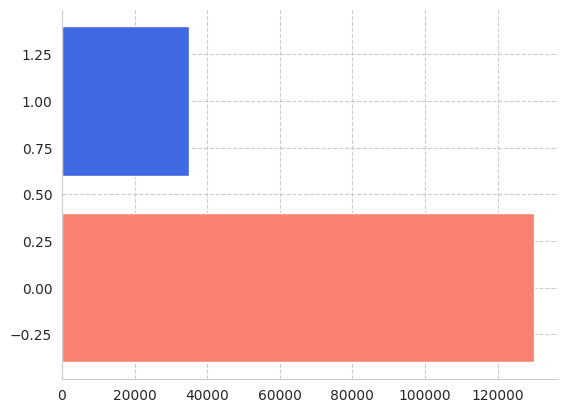

In [20]:
hist_df = train.groupby("Exited").size()
plt.barh(y=[0,1],width=hist_df.values, color=["salmon","royalblue"] )

## 3.0 Baseline Model:

In [21]:
# Preprocessing
def preprocess_data(train_df, test_df):
    # Separate features and target from training data
    X_train = train_df.reset_index().drop(columns=['Exited', 'id', 'CustomerId', 'Surname'])
    y_train = train_df['Exited']
    X_test = test_df.reset_index().drop(columns=['id', 'CustomerId', 'Surname'])

    # List of numerical and categorical columns
    num_cols = X_train.select_dtypes(include=['float64']).columns
    cat_cols = X_train.select_dtypes(include=['object','int64']).columns

    # Create a column transformer for preprocessing
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), num_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
        ]
    )

    return X_train, y_train, X_test, preprocessor

In [22]:
# Model Training and Prediction
def train_and_predict(X_train, y_train, X_test, preprocessor):
    # Define models
    models = {
        'RandomForest': RandomForestClassifier(random_state=17),
        'ExtraTrees': ExtraTreesClassifier(random_state=17),
        'GradientBoosting': GradientBoostingClassifier(random_state=17)
    }

    # Dictionary to store predictions
    predictions_score = {}

    # Cross_validation Strategy:
    skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

    # Train each model and predict
    for name, model in models.items():
        print(f"Running {name} Model")
        # Create a pipeline with preprocessing and the model
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

        # Fit the model
        mean_score = cross_val_score(pipeline, X_train, y_train, n_jobs=-1, cv=skf, scoring="roc_auc").mean()

        # Predict and store
        predictions_score[name] = mean_score

    return predictions_score

In [23]:
# Preprocess the data
X_train, y_train, X_test, preprocessor = preprocess_data(train, test)

# Train models and make predictions
#predictions = train_and_predict(X_train, y_train, X_test, preprocessor)

In [24]:
#predictions

Baseline Results:

- 'RandomForest': 0.8709466218245403,
-  'ExtraTrees': 0.8581569776102255,
-  'GradientBoosting': 0.8884766649244149

### 3.1 Opt Baseline:

In [25]:
skf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=48)

X = train.reset_index().drop(columns=['Exited', 'id', 'CustomerId', 'Surname'])
y = train['Exited']

def objective(trial):

      n_estimators = trial.suggest_int('n_estimators',100, 300, step=100)
      max_depth = trial.suggest_int('max_depth', 5, 20, step=5)
      min_samples_split = trial.suggest_int("min_samples_split", 2, 10, step=2)
      min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 5, step=1)
      max_samples = trial.suggest_uniform("max_samples", 0.5, 1.0)
      max_features = trial.suggest_int("max_features", 5, 15, step=1)

      num_cols = X.select_dtypes(include=['float64']).columns
      cat_cols = X.select_dtypes(include=['object','int64']).columns

      preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), num_cols),('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)])

      clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                   min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                   max_samples=max_samples)

      pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', clf)])

      score = cross_val_score(pipeline, X, y, n_jobs=-1, cv=skf, scoring="roc_auc").mean()

      return score

In [26]:
# Create study object
study = optuna.create_study(direction="maximize", study_name="baseline_opt")

# Run optimization process
#study.optimize(objective, n_trials=10, show_progress_bar=True)

[I 2024-01-16 10:20:26,315] A new study created in memory with name: baseline_opt


In [27]:
#trial = study.best_trial
#print('AUC: {}'.format(trial.value))
#print("Best hyperparameters: {}".format(trial.params))

In [28]:
print('''
AUC: 0.8866017826481439
Best hyperparameters: {'n_estimators': 300, 'max_depth': 15, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_samples': 0.5815986886714628, 'max_features': 6}
''')


AUC: 0.8866017826481439
Best hyperparameters: {'n_estimators': 300, 'max_depth': 15, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_samples': 0.5815986886714628, 'max_features': 6}



In [29]:
#fig = optuna.visualization.plot_optimization_history(study)
#fig.show()

## 4.0 Test for Duplicate Rows:

### 4.1 In train Dataset:

In [30]:
concat_df = pd.concat([train, old_train],axis=0, ignore_index=True)

In [31]:
y_concat = concat_df["Exited"]
X_concat = concat_df.drop("Exited",axis=1)

X_concat["dup"] = X_concat.duplicated()
X_concat["Exited"] = y_concat

In [32]:
duplicates = X_concat[X_concat.dup==True]
cols = ["CustomerId",	"Surname",	"CreditScore",	"Geography",	"Gender",	"Age",	"Tenure",	"Balance",	"NumOfProducts",	"HasCrCard",	"IsActiveMember",	"EstimatedSalary"]

In [33]:
df = train.join(old_train.set_index(list(test.columns)),on=list(test.columns),how='inner',rsuffix='_o')
print(F'{len(df)=}')
print(F'{(df["Exited"]!=df["Exited_o"]).all()}')

len(df)=604
True


In [34]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited_o
id,,,,,,,,,,,,,,
97,15576935,Ampt,743.0,Spain,Male,43.0,2,161807.18,2,0,1,93228.86,0,1
114,15603683,Ofodile,796.0,Spain,Female,23.0,3,146584.19,2,0,0,125445.80,1,0
543,15678727,Tan,770.0,Germany,Male,45.0,4,110765.68,1,1,0,26163.74,0,1
1615,15800514,Kenechukwu,477.0,Germany,Female,24.0,2,95675.62,2,0,0,162699.70,0,1
1933,15685019,Graham,528.0,France,Male,29.0,3,102787.42,1,1,0,55972.56,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162755,15744689,T'ang,479.0,Germany,Male,35.0,9,92833.89,1,1,0,99449.86,0,1
163068,15742272,Ozerova,669.0,France,Female,44.0,8,96418.09,1,0,0,131609.48,0,1
163865,15605130,Seccombe,753.0,France,Male,32.0,6,177729.13,1,1,1,161642.08,1,0


In [35]:
df[(df.CustomerId==15659428)&(df.Surname=="Maggard")&(df.CreditScore==520.0)&(df.Geography=="Spain")&(df.Gender=="Female")&(df.Tenure	==6)]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited_o
id,,,,,,,,,,,,,,
79643,15659428,Maggard,520.0,Spain,Female,42.0,6,0.0,2,1,1,34410.55,1,0


### 4.2 In Test Dataset:

In [36]:
concat_df = pd.concat([test, old_train],axis=0, ignore_index=True)

In [37]:
y_concat = concat_df["Exited"]
X_concat = concat_df.drop("Exited",axis=1)

X_concat["dup"] = X_concat.duplicated()
X_concat["Exited"] = y_concat

In [38]:
X_concat[X_concat.dup==True]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,dup,Exited
110027,15574012,Chu,645.0,Spain,Male,44.0,8,113755.78,2,1,0,149756.71,True,1.0
110043,15625047,Yen,846.0,France,Female,38.0,5,0.00,1,1,1,187616.16,True,0.0
110048,15656300,Lucciano,411.0,France,Male,29.0,0,59697.17,2,1,1,53483.21,True,0.0
110065,15602280,Martin,829.0,Germany,Female,27.0,9,112045.67,1,1,1,119708.21,True,1.0
110066,15771573,Okagbue,637.0,Germany,Female,39.0,9,137843.80,1,1,1,117622.80,True,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119978,15677783,Graham,764.0,Spain,Male,38.0,4,113607.47,1,1,0,91094.46,True,0.0
119979,15681026,Lucciano,795.0,Germany,Female,33.0,9,104552.72,1,1,1,120853.83,True,1.0
119986,15603794,Pugliesi,623.0,France,Male,48.0,5,118469.38,1,1,1,158590.25,True,0.0
120018,15682355,Sabbatini,772.0,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,True,1.0


In [39]:
testj = test.copy()
testj["Exited"] = np.nan

df_test = testj.join(old_train.set_index(list(test.columns)),on=list(test.columns),how='inner',rsuffix='_o')
print(F'{len(df_test)=}')
print(F'{(df_test["Exited"]!=df_test["Exited_o"]).all()}')

len(df_test)=398
True


In [40]:
df_test

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited_o
id,,,,,,,,,,,,,,
165430,15732563,Swanton,726.0,Germany,Female,33.0,7,99046.31,2,1,1,56053.06,NaN,0
165722,15613749,Lees,569.0,Spain,Male,34.0,0,151839.26,1,1,0,102299.81,NaN,1
165984,15641595,Jonathan,685.0,Spain,Male,43.0,4,97392.18,2,1,0,43956.83,NaN,0
166638,15579617,Sinclair,489.0,France,Female,51.0,3,0.00,2,0,1,174098.28,NaN,1
167218,15807563,Ch'iu,841.0,France,Female,52.0,5,0.00,1,0,0,183239.71,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272929,15708362,Watson,793.0,France,Male,63.0,4,103729.79,2,1,1,80272.06,NaN,0
273022,15604295,Wei,543.0,France,Male,36.0,6,0.00,2,1,0,176728.28,NaN,0
273075,15694404,Eberegbulam,781.0,France,Female,42.0,3,156555.54,1,1,1,175674.01,NaN,0


In [41]:
len(df_test)/len(test)

0.0036174254474064514

### 4.3 Store Duplicate Results:

**Test**

In [42]:
df_test["Exited"] = df_test["Exited_o"]
df_test["Exited"].replace({0:1,1:0},inplace=True)
duplicate_index_test = df_test.index
duplicate_results_test = df_test.Exited.values

**Train**

In [43]:
df["Exited"] = df["Exited_o"]
df["Exited"].replace({0:1,1:0},inplace=True)
duplicate_index_train = df.index
duplicate_results_train = df.Exited.values

In [44]:
duplicate_results_train_df = pd.DataFrame(index=duplicate_index_train,data=duplicate_results_train,columns=["Exited"])
duplicate_results_test_df = pd.DataFrame(index=duplicate_index_test,data=duplicate_results_test,columns=["Exited"])
duplicate_results_test_df.head(3)

,Exited
id,
165430,1
165722,0
165984,1


In [45]:
duplicate_results_test_df.to_csv("known_test_targets.csv")

## 5.0 EDA

### 5.2 Cat Features:

In [46]:
def plot_cat_features(df,cat_var, rows=2,figsize=(12,6)):
  df_=df.copy()
  fig, axs = plt.subplots(rows,3,figsize=figsize)
  axs=np.ravel(axs)

  for num, cvar in enumerate(cat_var):
    stacked_cvar = df_.groupby(["Exited",cvar])[cvar].agg("count").unstack("Exited")
    stacked_cvar.plot(kind='bar', stacked=False, color=['royalblue', 'tomato'],ax=axs[num])

  plt.tight_layout()

In [47]:
cat_cols = X.select_dtypes(include=['object','int64']).columns

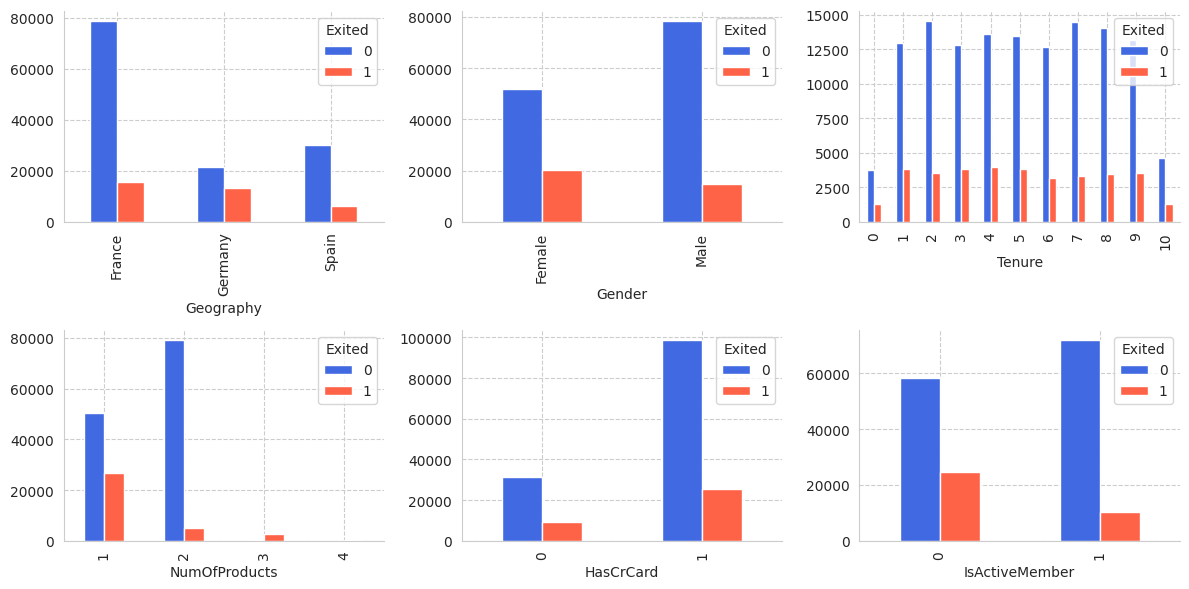

In [48]:
plot_cat_features(train,cat_cols)

#### 5.2.1 New Categorical:

**NumOfProducts** exceeding 2 have very low occurance, therefore they are aggregated:

In [49]:
train.NumOfProducts.replace({4:3},inplace=True)
test.NumOfProducts.replace({4:3},inplace=True)

In [50]:
def age_tr(df) :
    df['Age_Category'] = pd.cut(df['Age'], bins=[0, 35, 40, 45, 50, 60, 100], labels=['18-35', '35-40', '40-45', '45-50', '50-60', '60+'])
    return df

train = age_tr(train)
test = age_tr(test)

In [51]:
def cred_score_tr(df) :
    df['Credit_Score_Range'] = pd.cut(df['CreditScore'], bins=[0, 500, 600, 700, 800, 1000], labels=['0-500', '500-600', '600-700', '700-800','800+'])
    return df
train = cred_score_tr(train)
test = cred_score_tr(test)

In [52]:
def geo_gender_tr(df) :
    df['Geo_Gender'] = df['Geography'] + '_' + df['Gender']
    return df

train = geo_gender_tr(train)
test = geo_gender_tr(test)

In [53]:
def salary_tr(df) :
    df['EstimatedSalary_Range'] = pd.cut(df['EstimatedSalary'], bins=[0, 50_000, 100_000, 150_000, 200_000], labels=['0-50', '50-100', '100-150', '150+'])
    return df
train = salary_tr(train)
test = salary_tr(test)

In [54]:
def balance_tr(df) :
    df['Balance_Range'] = pd.cut(df['Balance'],  bins=[-1, 1, 100_000, 125_000, 150_000, 500_000], labels=['0', '0-100', '100-125', '125-150', '150+'])
    return df
train = balance_tr(train)
test = balance_tr(test)

In [55]:
#train.isna().sum(),test.isna().sum()

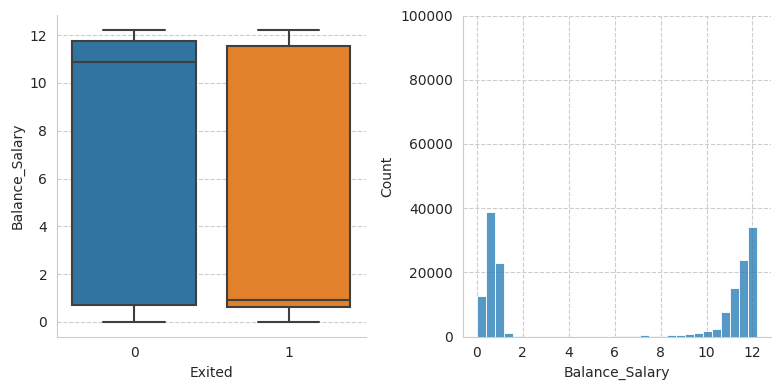

In [56]:
train["Balance_Salary"] = train["EstimatedSalary"]/(train["Balance"]+1)
train["Balance_Salary"] = np.log(train["Balance_Salary"]+1)

test["Balance_Salary"] = test["EstimatedSalary"]/(test["Balance"]+1)
test["Balance_Salary"] = np.log(test["Balance_Salary"]+1)

#sns.boxplot(data=train.sample(1000), x="Balance_salary")
_, ax = plt.subplots(1,2,figsize=(8,4))
sns.boxplot(data=train, x="Exited", y="Balance_Salary",ax=ax[0])
sns.histplot(data=train,x="Balance_Salary",ax=ax[1])
ax[1].set_ylim(0,100_000)
plt.tight_layout()

In [57]:
def balance_sal_tr(df) :
    df['Balance_Salary_Range'] = pd.cut(df['Balance_Salary'],  bins=[0, 1, 100], labels=['0','1'])
    return df
train = balance_sal_tr(train)
test = balance_sal_tr(test)

In [58]:
def card_active_tr(df) :
    df['bs_active'] = df['Balance_Salary_Range'].astype("str") + '_' + df['IsActiveMember'].astype("str")
    return df

train = card_active_tr(train)
test = card_active_tr(test)

In [59]:
def bs_gender_tr(df) :
    df['bs_gender'] = df['Balance_Salary_Range'].astype("str") + '_' + df['Gender'].astype("str")
    return df

train = bs_gender_tr(train)
test = bs_gender_tr(test)

In [60]:
def bs_nop_tr(df) :
    df['bs_nop'] = df['Balance_Salary_Range'].astype("str") + '_' + df['NumOfProducts'].astype("str")
    df['bs_nop'] = df['bs_nop'].replace({"0_3":"3","1_3":"3"})
    return df

train = bs_nop_tr(train)
test = bs_nop_tr(test)

In [61]:
def bs_age_tr(df) :
    df['bs_age'] = df['Balance_Salary_Range'].astype("str") + '_' + df['Age_Category'].astype("str")
    #replace_rel = dict(zip(["1_18-30","1_30-40"],[1,0]))
    #not_rel = {'0_18-30':0, '0_30-40':0, '0_40-50':0, '0_50-60':0, '0_60+':0, '1_40-50':0, '1_50-60':0, '1_60+':0}

    #df['bs_age'] = df['bs_age'].replace(replace_rel)
    #df['bs_age'] = df['bs_age'].replace(not_rel)

    return df

train = bs_age_tr(train)
test = bs_age_tr(test)

In [62]:
def active_nop_tr(df) :
    df['act_nop'] = df['IsActiveMember'].astype("str") + '_' + df['NumOfProducts'].astype("str")
    df['act_nop'] = df['act_nop'].replace({"0_3":"3","1_3":"3"})
    return df

train = active_nop_tr(train)
test = active_nop_tr(test)

In [63]:
def active_age_tr(df) :
    df['act_age'] = df['IsActiveMember'].astype("str") + '_' + df['Age_Category'].astype("str")
    #df['act_age'] = df['act_age'].replace({"0_3":"3","1_3":"3"})
    return df

train = active_age_tr(train)
test = active_age_tr(test)

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165034 entries, 0 to 165033
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   CustomerId             165034 non-null  int64   
 1   Surname                165034 non-null  object  
 2   CreditScore            165034 non-null  float64 
 3   Geography              165034 non-null  object  
 4   Gender                 165034 non-null  object  
 5   Age                    165034 non-null  float64 
 6   Tenure                 165034 non-null  int64   
 7   Balance                165034 non-null  float64 
 8   NumOfProducts          165034 non-null  int64   
 9   HasCrCard              165034 non-null  int64   
 10  IsActiveMember         165034 non-null  int64   
 11  EstimatedSalary        165034 non-null  float64 
 12  Exited                 165034 non-null  int64   
 13  Age_Category           165034 non-null  category
 14  Credit_Score_Range  

In [65]:
y = train['Exited']

cat_cols = train.select_dtypes(include=['object','int64','category']).columns
cat_cols = list(cat_cols)
cat_cols.remove("Exited")
cat_cols.remove("CustomerId")
cat_cols.remove("Surname")
cat_cols

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Age_Category',
 'Credit_Score_Range',
 'Geo_Gender',
 'EstimatedSalary_Range',
 'Balance_Range',
 'Balance_Salary_Range',
 'bs_active',
 'bs_gender',
 'bs_nop',
 'bs_age',
 'act_nop',
 'act_age']

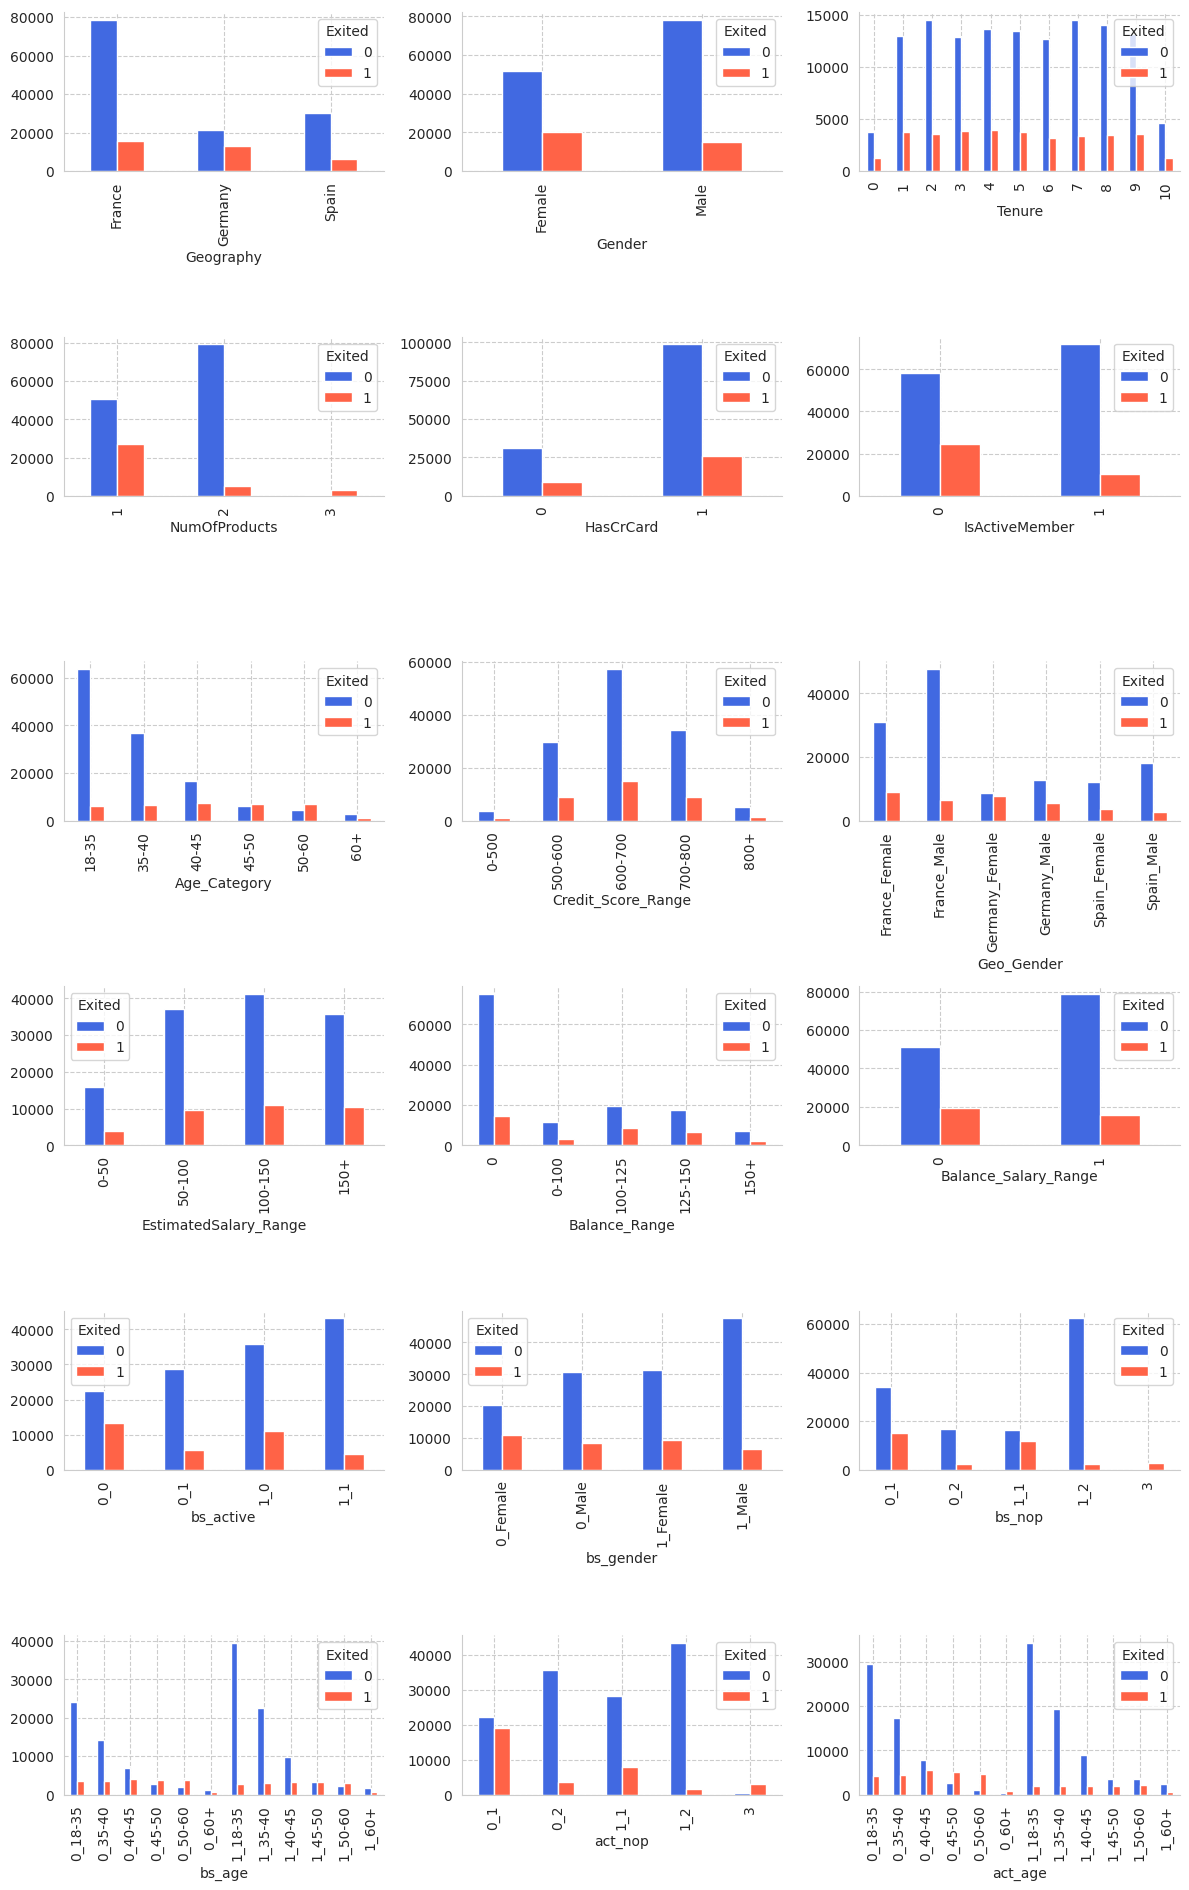

In [66]:
plot_cat_features(train,cat_cols, rows=6, figsize=(12,19))

In [67]:
train.isna().sum()

CustomerId               0
Surname                  0
CreditScore              0
Geography                0
Gender                   0
Age                      0
Tenure                   0
Balance                  0
NumOfProducts            0
HasCrCard                0
IsActiveMember           0
EstimatedSalary          0
Exited                   0
Age_Category             0
Credit_Score_Range       0
Geo_Gender               0
EstimatedSalary_Range    0
Balance_Range            0
Balance_Salary           0
Balance_Salary_Range     0
bs_active                0
bs_gender                0
bs_nop                   0
bs_age                   0
act_nop                  0
act_age                  0
dtype: int64

In [68]:
verify = train.groupby(["act_age","Exited"]).size().unstack("Exited")
verify["ratio"] = verify.loc[:,0].divide(verify.loc[:,1])
verify

Exited,0,1,ratio
act_age,,,
0_18-35,29450,4203,7.006900
0_35-40,17256,4503,3.832112
0_40-45,7738,5480,1.412044
0_45-50,2587,5117,0.505570
0_50-60,927,4608,0.201172
0_60+,303,713,0.424965
1_18-35,34205,1927,17.750389
1_35-40,19384,1855,10.449596
1_40-45,8965,1980,4.527778


### 5.1 Num Features:

Analyze Best transformation by a AUC Score perspective:

In [69]:
def min_max_scaler(train, test, column):
    '''
    Min Max just based on train might have an issue if test has extreme values, hence changing the denominator uding overall min and max
    '''
    sc=MinMaxScaler()

    #max_val=max(train[column].max(),test[column].max())
    #min_val=min(train[column].min(),test[column].min())

    train[[column]]=sc.fit_transform(train[[column]])
    test[[column]]=sc.transform(test[[column]])

    return train,test

In [70]:
cont_cols = [f for f in train.columns if train[f].dtype != 'int' and train[f].dtype != 'category' and train[f].dtype !='object']

sc=MinMaxScaler()

global unimportant_features
global overall_best_score
global overall_best_col
unimportant_features=[]
overall_best_score=0
overall_best_col='none'

train_ext = train.copy()
test_ext = test.copy()

for col in cont_cols:
     train_ext, test_ext = min_max_scaler(train_ext, test_ext, col)

def transformer(train, test,cont_cols, target):
    '''
    Algorithm applies multiples transformations on selected columns and finds the best transformation using a single variable model performance
    '''
    global unimportant_features
    global overall_best_score
    global overall_best_col
    train_copy = train.copy()
    test_copy = test.copy()
    table = PrettyTable()
    table.field_names = ['Feature', 'Initial ROC_AUC', 'Transformation', 'Tranformed ROC_AUC']

    for col in cont_cols:

        for c in ["log_"+col, "sqrt_"+col, "bx_cx_"+col, "y_J_"+col, "log_sqrt"+col, "pow_"+col, "pow2_"+col, "quant_"+col]:
            if c in train_copy.columns:
                train_copy = train_copy.drop(columns=[c])

        # Log Transformation after MinMax Scaling (keeps data between 0 and 1)
        train_copy["log_"+col] = np.log1p(train_copy[col])
        test_copy["log_"+col] = np.log1p(test_copy[col])
        # Square Root Transformation
        train_copy["sqrt_"+col] = np.sqrt(train_copy[col])
        test_copy["sqrt_"+col] = np.sqrt(test_copy[col])
        # Box-Cox transformation
        combined_data = pd.concat([train_copy[[col]], test_copy[[col]]], axis=0)
        epsilon = 1e-5
        transformer = PowerTransformer(method='box-cox')
        train_copy["bx_cx_"+col] = transformer.fit_transform(train_copy[[col]] + epsilon)
        test_copy["bx_cx_"+col] = transformer.transform(test_copy[[col]] + epsilon)
        # Yeo-Johnson transformation
        transformer = PowerTransformer(method='yeo-johnson')
        train_copy["y_J_"+col] = transformer.fit_transform(train_copy[[col]])
        test_copy["y_J_"+col] = transformer.transform(test_copy[[col]])
        # Power transformation, 0.25
        power_transform = lambda x: np.power(x + 1 - np.min(x), 0.25)
        transformer = FunctionTransformer(power_transform)
        train_copy["pow_"+col] = transformer.fit_transform(train_copy[[col]])
        test_copy["pow_"+col] = transformer.transform(test_copy[[col]])
        # Power transformation, 2
        power_transform = lambda x: np.power(x + 1 - np.min(x), 2)
        transformer = FunctionTransformer(power_transform)
        train_copy["pow2_"+col] = transformer.fit_transform(train_copy[[col]])
        test_copy["pow2_"+col] = transformer.transform(test_copy[[col]])
        # Log to power transformation
        train_copy["log_sqrt"+col] = np.log1p(train_copy["sqrt_"+col])
        test_copy["log_sqrt"+col] = np.log1p(test_copy["sqrt_"+col])
        # quantile transformation
        transformer = QuantileTransformer(output_distribution='normal', subsample=25_000, random_state=42)
        train_copy["quant_"+col] = transformer.fit_transform(train_copy[[col]])
        test_copy["quant_"+col] = transformer.transform(test_copy[[col]])

        temp_cols = [col, "log_"+col, "sqrt_"+col, "bx_cx_"+col, "y_J_"+col,  "pow_"+col , "pow2_"+col,"log_sqrt"+col,"quant_"+col]

        #train_copy,test_copy = fill_missing_numerical(train_copy,test_copy,target,5)

        pca = TruncatedSVD(n_components=1, random_state=17)
        x_pca_train = pca.fit_transform(train_copy[temp_cols])
        x_pca_test = pca.transform(test_copy[temp_cols])
        x_pca_train = pd.DataFrame(x_pca_train, columns=[col+"_pca_comb"])
        x_pca_test = pd.DataFrame(x_pca_test, columns=[col+"_pca_comb"])
        temp_cols.append(col+"_pca_comb")

        test_copy = test_copy.reset_index(drop=True)

        train_copy = pd.concat([train_copy, x_pca_train], axis='columns')
        test_copy = pd.concat([test_copy, x_pca_test], axis='columns')

        kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

        auc_scores = []

        for f in temp_cols:
            X = train_copy[[f]].values
            y = train_copy[target].values

            auc = []
            for train_idx, val_idx in kf.split(X, y):
                X_train, y_train = X[train_idx], y[train_idx]
                x_val, y_val = X[val_idx], y[val_idx]

                model =   LogisticRegression() # since it is a large dataset, Logistic Regression would be a good option to save time
                model.fit(X_train,y_train)
                y_pred = model.predict_proba(x_val)[:,1]
                auc.append(cross_val_score(model, X_train, y_train, n_jobs=-1, cv=kf, scoring="roc_auc").mean()) #cross_val_score(model, X_train, y_train, n_jobs=-1, cv=kf, scoring="roc_auc").mean()
            auc_scores.append((f, np.mean(auc)))

            if overall_best_score < np.mean(auc):
                overall_best_score = np.mean(auc)
                overall_best_col = f

            if f == col:
                orig_auc = np.mean(auc)

        best_col, best_auc = sorted(auc_scores, key=lambda x: x[1], reverse=True)[0]
        cols_to_drop = [f for f in temp_cols if f != best_col]
        final_selection = [f for f in temp_cols if f not in cols_to_drop]

        if cols_to_drop:
            unimportant_features = unimportant_features+cols_to_drop
        table.add_row([col,orig_auc,best_col ,best_auc])
    print(table)
    print("overall best CV ROC AUC score: ",overall_best_score)
    return train_copy, test_copy

train, test = transformer(train_ext, test_ext, cont_cols, target="Exited")

+-----------------+--------------------+-----------------------+--------------------+
|     Feature     |  Initial ROC_AUC   |     Transformation    | Tranformed ROC_AUC |
+-----------------+--------------------+-----------------------+--------------------+
|   CreditScore   | 0.5205836723259359 |      CreditScore      | 0.5205836723259359 |
|       Age       | 0.7504655133415615 |      Age_pca_comb     | 0.7504657428229109 |
|     Balance     | 0.5818803985720856 |    Balance_pca_comb   | 0.5818804002915028 |
| EstimatedSalary | 0.5141334819021856 | quant_EstimatedSalary | 0.5141334824180476 |
|  Balance_Salary | 0.5758136782645089 |     Balance_Salary    | 0.5758136782645089 |
+-----------------+--------------------+-----------------------+--------------------+
overall best CV ROC AUC score:  0.7504657428229109


In [71]:
print(unimportant_features)

['log_CreditScore', 'sqrt_CreditScore', 'bx_cx_CreditScore', 'y_J_CreditScore', 'pow_CreditScore', 'pow2_CreditScore', 'log_sqrtCreditScore', 'quant_CreditScore', 'CreditScore_pca_comb', 'Age', 'log_Age', 'sqrt_Age', 'bx_cx_Age', 'y_J_Age', 'pow_Age', 'pow2_Age', 'log_sqrtAge', 'quant_Age', 'Balance', 'log_Balance', 'sqrt_Balance', 'bx_cx_Balance', 'y_J_Balance', 'pow_Balance', 'pow2_Balance', 'log_sqrtBalance', 'quant_Balance', 'EstimatedSalary', 'log_EstimatedSalary', 'sqrt_EstimatedSalary', 'bx_cx_EstimatedSalary', 'y_J_EstimatedSalary', 'pow_EstimatedSalary', 'pow2_EstimatedSalary', 'log_sqrtEstimatedSalary', 'EstimatedSalary_pca_comb', 'log_Balance_Salary', 'sqrt_Balance_Salary', 'bx_cx_Balance_Salary', 'y_J_Balance_Salary', 'pow_Balance_Salary', 'pow2_Balance_Salary', 'log_sqrtBalance_Salary', 'quant_Balance_Salary', 'Balance_Salary_pca_comb']


In [72]:
train.shape

(165034, 71)

#### 5.2.2 New Datasets

In [73]:
train_ = train.copy()#.drop(["Age","Balance","EstimatedSalary","CreditScore","Balance_Salary"],axis=1)
test_ = test.copy()#drop(["Age","Balance","EstimatedSalary","CreditScore","Balance_Salary"],axis=1)

## 8.0 Target Encoding:

In [74]:
from sklearn.base import BaseEstimator, TransformerMixin

class TargetEncode(BaseEstimator, TransformerMixin):

    def __init__(self, categories='auto', k=1, f=1,
                 noise_level=0, random_state=None):
        if type(categories)==str and categories!='auto':
            self.categories = [categories]
        else:
            self.categories = categories
        self.k = k
        self.f = f
        self.noise_level = noise_level
        self.encodings = dict()
        self.prior = None
        self.random_state = random_state

    def add_noise(self, series, noise_level):
        return series * (1 + noise_level *
                         np.random.randn(len(series)))

    def fit(self, X, y=None):
        if type(self.categories)=='auto':
            self.categories = np.where(X.dtypes == type(object()))[0]

        temp = X.loc[:, self.categories].copy()
        temp['target'] = y
        self.prior = np.mean(y)
        for variable in self.categories:
            avg = (temp.groupby(by=variable)['target']
                       .agg(['mean', 'count']))
            # Compute smoothing
            smoothing = (1 / (1 + np.exp(-(avg['count'] - self.k) /
                         self.f)))
            # The bigger the count the less full_avg is accounted
            self.encodings[variable] = dict(self.prior * (1 -
                             smoothing) + avg['mean'] * smoothing)

        return self

    def transform(self, X):
        Xt = X.copy()
        for variable in self.categories:
            Xt[variable].replace(self.encodings[variable],
                                 inplace=True)
            unknown_value = {value:self.prior for value in
                             X[variable].unique()
                             if value not in
                             self.encodings[variable].keys()}
            if len(unknown_value) > 0:
                Xt[variable].replace(unknown_value, inplace=True)
            Xt[variable] = Xt[variable].astype(float)
            if self.noise_level > 0:
                if self.random_state is not None:
                    np.random.seed(self.random_state)
                Xt[variable] = self.add_noise(Xt[variable],
                                              self.noise_level)
        return Xt

    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)

In [75]:
X_train_enc = train_.copy()
X_test_enc = test_.copy()

X_test_enc.shape, X_train_enc.shape

((110023, 70), (165034, 71))

In [76]:
list_to_encode = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard',
                  'IsActiveMember', 'Age_Category', 'Credit_Score_Range', 'Geo_Gender',
                  'EstimatedSalary_Range', 'Balance_Range', 'Balance_Salary_Range',
                  'bs_active', 'bs_gender', 'bs_nop', 'bs_age', 'act_nop', 'act_age']


new_cols = [col+"_enc" for col in list_to_encode]
te = TargetEncode(categories=list_to_encode,noise_level=0.05, k=1, f=1)
te.fit(X_train_enc, X_train_enc['Exited'])
data = te.transform(X_train_enc[list_to_encode])
data_test = te.transform(X_test_enc[list_to_encode])
X_train_enc[new_cols] = data.values
X_test_enc[new_cols] = data_test.values

In [77]:
gc.collect()

66857

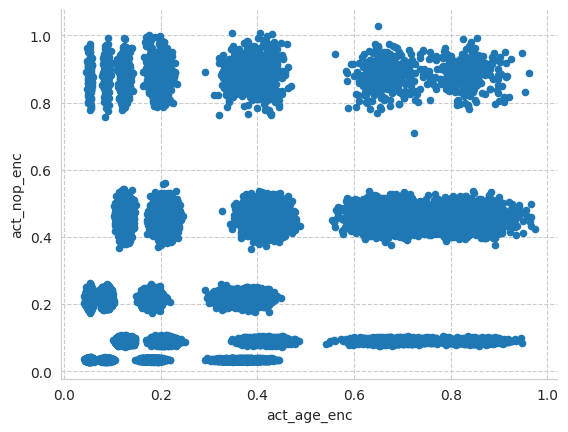

In [78]:
X_test_enc.plot(kind="scatter", x="act_age_enc",y="act_nop_enc");

In [79]:
summary(X_train_enc).style.background_gradient(cmap='Reds')

data shape: (165034, 89)


,data type,#missing,%missing,#unique,min,max,median
CustomerId,int64,0,0.000000,23221,15565701.000000,15815690.000000,15690169.000000
Surname,object,0,0.000000,2797,nan,nan,nan
CreditScore,float64,0,0.000000,457,0.000000,1.000000,0.618000
Geography,object,0,0.000000,3,nan,nan,nan
Gender,object,0,0.000000,2,nan,nan,nan
Age,float64,0,0.000000,71,0.000000,1.000000,0.256757
Tenure,int64,0,0.000000,11,0.000000,10.000000,5.000000
Balance,float64,0,0.000000,30075,0.000000,1.000000,0.000000
NumOfProducts,int64,0,0.000000,3,1.000000,3.000000,2.000000
HasCrCard,int64,0,0.000000,2,0.000000,1.000000,1.000000


In [80]:
X_train_enc.drop("Age_Category",axis=1,inplace=True)
X_test_enc.drop("Age_Category",axis=1,inplace=True)

## 9.0 Eliminate uncommon entries:

### 9.1 TFIDF-PCA (Text Transformation)

In [81]:
train = X_train_enc.copy()
test = X_test_enc.copy()

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tf_idf(train, test, column,n,p):
    vectorizer=TfidfVectorizer(max_features=n)
    vectors_train=vectorizer.fit_transform(train[column])
    vectors_test=vectorizer.transform(test[column])

    svd=TruncatedSVD(p, random_state=42)
    x_pca_train=svd.fit_transform(vectors_train)
    x_pca_test=svd.transform(vectors_test)
    tfidf_df_train=pd.DataFrame(x_pca_train)
    tfidf_df_test=pd.DataFrame(x_pca_test)


    cols=[(column+"_tfidf_"+str(f)) for f in tfidf_df_train.columns]
    tfidf_df_train.columns=cols
    tfidf_df_test.columns=cols
    train=pd.concat([train,tfidf_df_train], axis="columns")
    test=pd.concat([test,tfidf_df_test], axis="columns")

    return train, test

train,test=tf_idf(train,test,"Surname",1000,5)
train.drop(columns=["Surname"], inplace=True)
test.drop(columns=["Surname"], inplace=True)

In [83]:
train.shape,test.shape

((165034, 92), (110023, 91))

In [84]:
cat_cols = [f for f in test.columns if (train[f].dtype != 'O' and train[f].nunique()/train.shape[0]*100<=1 and train[f].nunique()>2 and 'tfidf' not in f) or (train[f].dtype == 'O') ]
cat_cols# = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'NumOfProducts']

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'NumOfProducts',
 'Credit_Score_Range',
 'Geo_Gender',
 'EstimatedSalary_Range',
 'Balance_Range',
 'bs_active',
 'bs_gender',
 'bs_nop',
 'bs_age',
 'act_nop',
 'act_age',
 'log_CreditScore',
 'sqrt_CreditScore',
 'bx_cx_CreditScore',
 'y_J_CreditScore',
 'pow_CreditScore',
 'pow2_CreditScore',
 'log_sqrtCreditScore',
 'quant_CreditScore',
 'CreditScore_pca_comb',
 'log_Age',
 'sqrt_Age',
 'bx_cx_Age',
 'y_J_Age',
 'pow_Age',
 'pow2_Age',
 'log_sqrtAge',
 'quant_Age',
 'Age_pca_comb']

In [85]:
def nearest_val(target):
    return min(common, key=lambda x: abs(x - target))

# print(train[cat_cols].nunique())
cat_cols_updated=[]
for col in tqdm(cat_cols):

  if train[col].dtype=="O":
    train[col]=train[col].astype(str)+"_"+col
    test[col]=test[col].astype(str)+"_"+col
    uncommon=list((set(test[col].unique())| set(train[col].unique()))-(set(test[col].unique())& set(train[col].unique())))
    train[col]=train[col].apply(lambda x: "uncommon_"+col if x in uncommon else x)
    cat_cols_updated.append(col)

  else:
    train[f"{col}_cat"]=train[col]
    test[f"{col}_cat"]=test[col]
    cat_cols_updated.append(f"{col}_cat")
    uncommon=list((set(test[col].unique())| set(train[col].unique()))-(set(test[col].unique())& set(train[col].unique())))
    if uncommon:

      common=list(set(test[col].unique())& set(train[col].unique()))
      train[f"{col}_cat"]=train[col].apply(nearest_val)
      test[f"{col}_cat"]=test[col].apply(nearest_val)

cat_cols_updated = cat_cols_updated+cat_cols
cat_cols_updated = list(set(cat_cols_updated))

100%|██████████| 34/34 [04:48<00:00,  8.50s/it]


In [86]:
cat_cols_updated

['pow_CreditScore',
 'CreditScore_cat',
 'bx_cx_CreditScore',
 'Credit_Score_Range',
 'pow2_CreditScore_cat',
 'act_nop',
 'Tenure',
 'Age_cat',
 'EstimatedSalary_Range',
 'Age_pca_comb',
 'y_J_Age',
 'EstimatedSalary_Range_cat',
 'log_sqrtCreditScore_cat',
 'log_Age',
 'CreditScore',
 'sqrt_CreditScore',
 'sqrt_Age',
 'quant_Age',
 'Credit_Score_Range_cat',
 'CreditScore_pca_comb_cat',
 'log_sqrtAge_cat',
 'pow_CreditScore_cat',
 'bx_cx_Age',
 'bs_nop',
 'pow_Age_cat',
 'Age',
 'y_J_Age_cat',
 'log_CreditScore_cat',
 'bs_gender',
 'act_age',
 'bs_active',
 'log_sqrtAge',
 'bx_cx_Age_cat',
 'Balance_Range',
 'Geo_Gender',
 'log_CreditScore',
 'quant_Age_cat',
 'Tenure_cat',
 'sqrt_CreditScore_cat',
 'Balance_Range_cat',
 'pow2_CreditScore',
 'pow2_Age_cat',
 'NumOfProducts_cat',
 'y_J_CreditScore',
 'bs_age',
 'log_Age_cat',
 'Age_pca_comb_cat',
 'log_sqrtCreditScore',
 'Gender',
 'CreditScore_pca_comb',
 'sqrt_Age_cat',
 'quant_CreditScore_cat',
 'pow_Age',
 'Geography',
 'NumOfProduc

In [87]:
target = "Exited"
def OHE(train_df,test_df,cols,target):
    '''
    Function for one hot encoding, it first combines the data so that no category is missed and
    the category with least frequency can be dropped because of redundancy
    '''
    combined = pd.concat([train_df, test_df], axis=0)
    for col in cols:
        one_hot = pd.get_dummies(combined[col])
        counts = combined[col].value_counts()
        min_count_category = counts.idxmin()
        one_hot = one_hot.drop(min_count_category, axis=1)
        one_hot.columns=[str(f)+col+"_OHE" for f in one_hot.columns]
        combined = pd.concat([combined, one_hot], axis="columns")
        combined = combined.loc[:, ~combined.columns.duplicated()]

    # split back to train and test dataframes
    train_ohe = combined[:len(train_df)]
    test_ohe = combined[len(train_df):]
    test_ohe.reset_index(inplace=True,drop=True)
    test_ohe.drop(columns=[target],inplace=True)
    return train_ohe, test_ohe

def high_freq_ohe(train, test, extra_cols, target, n_limit=50):
    '''
    If you wish to apply one hot encoding on a feature with so many unique values, then this can be applied,
    where it takes a maximum of n categories and drops the rest of them treating as rare categories
    '''
    train_copy=train.copy()
    test_copy=test.copy()
    ohe_cols=[]
    for col in extra_cols:
        dict1=train_copy[col].value_counts().to_dict()
        ordered=dict(sorted(dict1.items(), key=lambda x: x[1], reverse=True))
        rare_keys=list([*ordered.keys()][n_limit:])
#         ext_keys=[f[0] for f in ordered.items() if f[1]<50]
        rare_key_map=dict(zip(rare_keys, np.full(len(rare_keys),9999)))

        train_copy[col]=train_copy[col].replace(rare_key_map)
        test_copy[col]=test_copy[col].replace(rare_key_map)
    train_copy, test_copy = OHE(train_copy, test_copy, extra_cols, target)
    drop_cols=[f for f in train_copy.columns if "9999" in f or train_copy[f].nunique()==1]
    train_copy=train_copy.drop(columns=drop_cols)
    test_copy=test_copy.drop(columns=drop_cols)

    return train_copy, test_copy

def cat_encoding(train, test, target):
    global overall_best_score
    global overall_best_col
    table = PrettyTable()
    table.field_names = ['Feature', 'Encoded Features', 'AUC Score']
    train_copy=train.copy()
    test_copy=test.copy()
    train_dum = train.copy()
    for feature in cat_cols_updated:

        dic = train[feature].value_counts().to_dict()
        train_copy[feature + "_count"] =train[feature].map(dic)
        test_copy[feature + "_count"] = test[feature].map(dic)

        train_copy[feature + "_count"] = train_copy[feature + "_count"].astype(float)
        test_copy[feature + "_count"] = test_copy[feature + "_count"].astype(float)

        dic2=train[feature].value_counts().to_dict()
        list1=np.arange(len(dic2.values())) # Higher rank for low count
        dic3=dict(zip(list(dic2.keys()),list1))

        train_copy[feature+"_count_label"]=train[feature].replace(dic3).astype(float)
        test_copy[feature+"_count_label"]=test[feature].replace(dic3).astype(float)

        temp_cols = [ feature + "_count", feature + "_count_label"]#feature + "_target",

        kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

        auc_scores = []

        for f in temp_cols:
            X = train_copy[[f]].values
            y = train_copy[target].astype(int).values

            auc = []
            for train_idx, val_idx in kf.split(X, y):
                X_train, y_train = X[train_idx], y[train_idx]
                x_val, y_val = X[val_idx], y[val_idx]
                model =  HistGradientBoostingClassifier (max_iter=300, learning_rate=0.02, max_depth=6, random_state=42)
                model.fit(X_train, y_train)
                y_pred = model.predict_proba(x_val)[:,1]
                auc.append(roc_auc_score(y_val,  y_pred))
            auc_scores.append((f, np.mean(auc)))
            if overall_best_score < np.mean(auc):
                overall_best_score = np.mean(auc)
                overall_best_col = f
        best_col, best_auc = sorted(auc_scores, key=lambda x: x[1], reverse=True)[0]

        corr = train_copy[temp_cols].corr(method='pearson')
        corr_with_best_col = corr[best_col]
        cols_to_drop = [f for f in temp_cols if corr_with_best_col[f] > 0.5 and f != best_col]
        final_selection = [f for f in temp_cols if f not in cols_to_drop]
        if cols_to_drop:
            train_copy = train_copy.drop(columns=cols_to_drop)
            test_copy = test_copy.drop(columns=cols_to_drop)

        table.add_row([feature, best_col, best_auc])
        print(feature)
    print(table)
    print("overall best CV score: ", overall_best_score)
    return train_copy, test_copy

train, test= cat_encoding(train, test, target)

pow_CreditScore
CreditScore_cat
bx_cx_CreditScore
Credit_Score_Range
pow2_CreditScore_cat
act_nop
Tenure
Age_cat
EstimatedSalary_Range
Age_pca_comb
y_J_Age
EstimatedSalary_Range_cat
log_sqrtCreditScore_cat
log_Age
CreditScore
sqrt_CreditScore
sqrt_Age
quant_Age
Credit_Score_Range_cat
CreditScore_pca_comb_cat
log_sqrtAge_cat
pow_CreditScore_cat
bx_cx_Age
bs_nop
pow_Age_cat
Age
y_J_Age_cat
log_CreditScore_cat
bs_gender
act_age
bs_active
log_sqrtAge
bx_cx_Age_cat
Balance_Range
Geo_Gender
log_CreditScore
quant_Age_cat
Tenure_cat
sqrt_CreditScore_cat
Balance_Range_cat
pow2_CreditScore
pow2_Age_cat
NumOfProducts_cat
y_J_CreditScore
bs_age
log_Age_cat
Age_pca_comb_cat
log_sqrtCreditScore
Gender
CreditScore_pca_comb
sqrt_Age_cat
quant_CreditScore_cat
pow_Age
Geography
NumOfProducts
bx_cx_CreditScore_cat
y_J_CreditScore_cat
pow2_Age
quant_CreditScore
+---------------------------+----------------------------------+--------------------+
|          Feature          |         Encoded Features      

In [88]:
def eliminate_duplicate_col(train,test):
  total_train = len(train)
  total_df = pd.concat([train,test],axis=0)
  print(f"Check shape \n- train: {train.shape}\n- test: {test.shape}")
  print(f"Original Data: {total_df.shape}")
  total_df = total_df.T.drop_duplicates().T

  print(f"New Data: {total_df.shape}")

  train = total_df.iloc[:total_train,:]
  test = total_df.iloc[total_train:,:]
  test.drop("Exited",axis=1,inplace=True)

  print(f"Check post-shape \n- train: {train.shape}\n- test: {test.shape}")
  return train, test

### 9.2 Label Encoding:

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165034 entries, 0 to 165033
Columns: 235 entries, CustomerId to quant_CreditScore_count_label
dtypes: category(7), float64(211), int64(8), object(9)
memory usage: 289.4+ MB


In [90]:
cat_cols = train.select_dtypes(["object","category"]).columns


enc = OrdinalEncoder(dtype=np.int32)
train[cat_cols] = enc.fit_transform(train[cat_cols])
test[cat_cols] = enc.transform(test[cat_cols])

In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165034 entries, 0 to 165033
Columns: 235 entries, CustomerId to quant_CreditScore_count_label
dtypes: float64(211), int32(16), int64(8)
memory usage: 287.1 MB


### 9.3 Numerical Clustering

<font size="3"> All the unimportant features that are not the best transformation technique are selected and applied a K-Means Clustering technique</font>

In [92]:
from sklearn.cluster import KMeans

print(unimportant_features)

for col in cont_cols:
    sub_set=[f for f in unimportant_features if col in f]
    print(sub_set)

['log_CreditScore', 'sqrt_CreditScore', 'bx_cx_CreditScore', 'y_J_CreditScore', 'pow_CreditScore', 'pow2_CreditScore', 'log_sqrtCreditScore', 'quant_CreditScore', 'CreditScore_pca_comb', 'Age', 'log_Age', 'sqrt_Age', 'bx_cx_Age', 'y_J_Age', 'pow_Age', 'pow2_Age', 'log_sqrtAge', 'quant_Age', 'Balance', 'log_Balance', 'sqrt_Balance', 'bx_cx_Balance', 'y_J_Balance', 'pow_Balance', 'pow2_Balance', 'log_sqrtBalance', 'quant_Balance', 'EstimatedSalary', 'log_EstimatedSalary', 'sqrt_EstimatedSalary', 'bx_cx_EstimatedSalary', 'y_J_EstimatedSalary', 'pow_EstimatedSalary', 'pow2_EstimatedSalary', 'log_sqrtEstimatedSalary', 'EstimatedSalary_pca_comb', 'log_Balance_Salary', 'sqrt_Balance_Salary', 'bx_cx_Balance_Salary', 'y_J_Balance_Salary', 'pow_Balance_Salary', 'pow2_Balance_Salary', 'log_sqrtBalance_Salary', 'quant_Balance_Salary', 'Balance_Salary_pca_comb']
['log_CreditScore', 'sqrt_CreditScore', 'bx_cx_CreditScore', 'y_J_CreditScore', 'pow_CreditScore', 'pow2_CreditScore', 'log_sqrtCreditScor

In [93]:
table = PrettyTable()
table.field_names = ['Clustered Feature', 'ROC AUC (CV-TRAIN)']
overall_best_score=0
for col in tqdm(cont_cols):
    sub_set=[f for f in unimportant_features if col in f]
    temp_train=train[sub_set]
    temp_test=test[sub_set]
    sc=StandardScaler()
    temp_train=sc.fit_transform(temp_train)
    temp_test=sc.transform(temp_test)

    # print(ideal_clusters)
    kmeans = KMeans(n_clusters=10, random_state=1978)
    kmeans.fit(np.array(temp_train))
    labels_train = kmeans.labels_

    train[col+"_unimp_cluster_WOE"] = labels_train
    test[col+"_unimp_cluster_WOE"] = kmeans.predict(np.array(temp_test))


    kf=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    X=train[[col+"_unimp_cluster_WOE"]].values
    y=train[target].astype(int).values

    auc=[]
    for train_idx, val_idx in kf.split(X,y):
        X_train,y_train=X[train_idx],y[train_idx]
        x_val,y_val=X[val_idx],y[val_idx]
        model = HistGradientBoostingClassifier(max_iter=300, learning_rate=0.02, max_depth=6, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict_proba(x_val)[:,1]
        auc.append(roc_auc_score(y_val,y_pred))

    table.add_row([col+"_unimp_cluster_WOE",np.mean(auc)])
    if overall_best_score<np.mean(auc):
        overall_best_score=np.mean(auc)
        overall_best_col=col+"_unimp_cluster_WOE"

print(table)
print("overall best CV score: ", overall_best_score)

100%|██████████| 5/5 [00:56<00:00, 11.21s/it]

+-----------------------------------+--------------------+
|         Clustered Feature         | ROC AUC (CV-TRAIN) |
+-----------------------------------+--------------------+
|   CreditScore_unimp_cluster_WOE   | 0.529492337845424  |
|       Age_unimp_cluster_WOE       | 0.7523560707576541 |
|     Balance_unimp_cluster_WOE     | 0.5922728854740111 |
| EstimatedSalary_unimp_cluster_WOE | 0.513003604702096  |
|  Balance_Salary_unimp_cluster_WOE | 0.5875247321915367 |
+-----------------------------------+--------------------+
overall best CV score:  0.7523560707576541


## 10.0 Arithmetic New Features

<font size="3">Until now, I have saved the best overall column and the best overall score, a few feature can be created based on the below criteria:</font>
* New features are based on the existing features by computing the arithmetic combinations
* The best arithmetic function is selected based on the individual performance
* If the best arithmetic feature has better AUC score than the overall best score or the correlation of this feature with the existing features is less than 0.9, then a new feature is added to the dataset.

In [94]:
train.shape

(165034, 240)

In [95]:
%%time
#train, test = eliminate_duplicate_col(train,test)
train.info()
test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 165034 entries, 0 to 165033
Columns: 240 entries, CustomerId to Balance_Salary_unimp_cluster_WOE
dtypes: float64(211), int32(21), int64(8)
memory usage: 290.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Columns: 239 entries, CustomerId to Balance_Salary_unimp_cluster_WOE
dtypes: float64(211), int32(21), int64(7)
memory usage: 191.8 MB
CPU times: user 21.8 ms, sys: 0 ns, total: 21.8 ms
Wall time: 21.8 ms


In [96]:
for col in train.columns:
  print(col)

CustomerId
CreditScore
Geography
Gender
Age
Tenure
Balance
NumOfProducts
HasCrCard
IsActiveMember
EstimatedSalary
Exited
Credit_Score_Range
Geo_Gender
EstimatedSalary_Range
Balance_Range
Balance_Salary
Balance_Salary_Range
bs_active
bs_gender
bs_nop
bs_age
act_nop
act_age
log_CreditScore
sqrt_CreditScore
bx_cx_CreditScore
y_J_CreditScore
pow_CreditScore
pow2_CreditScore
log_sqrtCreditScore
quant_CreditScore
CreditScore_pca_comb
log_Age
sqrt_Age
bx_cx_Age
y_J_Age
pow_Age
pow2_Age
log_sqrtAge
quant_Age
Age_pca_comb
log_Balance
sqrt_Balance
bx_cx_Balance
y_J_Balance
pow_Balance
pow2_Balance
log_sqrtBalance
quant_Balance
Balance_pca_comb
log_EstimatedSalary
sqrt_EstimatedSalary
bx_cx_EstimatedSalary
y_J_EstimatedSalary
pow_EstimatedSalary
pow2_EstimatedSalary
log_sqrtEstimatedSalary
quant_EstimatedSalary
EstimatedSalary_pca_comb
log_Balance_Salary
sqrt_Balance_Salary
bx_cx_Balance_Salary
y_J_Balance_Salary
pow_Balance_Salary
pow2_Balance_Salary
log_sqrtBalance_Salary
quant_Balance_Salary
B

In [97]:
def better_features(train, test, target, cols, best_score):
    new_cols = []
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Stratified k-fold object
    best_list=[]

    for i in tqdm(range(len(cols)), desc='Generating Columns'):
        col1 = cols[i]
        temp_df = pd.DataFrame()  # Temporary dataframe to store the generated columns
        temp_df_test = pd.DataFrame()  # Temporary dataframe for test data

        for j in range(i+1, len(cols)):
            col2 = cols[j]
            # Multiply
            temp_df[col1 + '*' + col2] = train[col1] * train[col2]
            temp_df_test[col1 + '*' + col2] = test[col1] * test[col2]

            # Divide (col1 / col2)
            temp_df[col1 + '/' + col2] = train[col1] / (train[col2] + 1e-5)
            temp_df_test[col1 + '/' + col2] = test[col1] / (test[col2] + 1e-5)

            # Divide (col2 / col1)
            temp_df[col2 + '/' + col1] = train[col2] / (train[col1] + 1e-5)
            temp_df_test[col2 + '/' + col1] = test[col2] / (test[col1] + 1e-5)

            # Subtract
            temp_df[col1 + '-' + col2] = train[col1] - train[col2]
            temp_df_test[col1 + '-' + col2] = test[col1] - test[col2]

            # Add
            temp_df[col1 + '+' + col2] = train[col1] + train[col2]
            temp_df_test[col1 + '+' + col2] = test[col1] + test[col2]

        SCORES = []
        for column in temp_df.columns:
            scores = []
            for train_index, val_index in skf.split(train, train[target]):
                X_train, X_val = temp_df[column].iloc[train_index].values.reshape(-1, 1), temp_df[column].iloc[val_index].values.reshape(-1, 1)
                y_train, y_val = train[target].astype(int).iloc[train_index], train[target].astype(int).iloc[val_index]
                model = HistGradientBoostingClassifier(max_iter=300, learning_rate=0.02, max_depth=6, random_state=42)
                model.fit(X_train, y_train)
                y_pred = model.predict_proba(X_val)[:,1]
                score = roc_auc_score( y_val, y_pred)
                scores.append(score)
            mean_score = np.mean(scores)
            SCORES.append((column, mean_score))

        if SCORES:
            best_col, best_auc = sorted(SCORES, key=lambda x: x[1],reverse=True)[0]
            corr_with_other_cols = train.drop([target] + new_cols, axis=1).corrwith(temp_df[best_col])
            if (corr_with_other_cols.abs().max() < 0.9 or best_auc > best_score) and corr_with_other_cols.abs().max() !=1 :
                train[best_col] = temp_df[best_col]
                test[best_col] = temp_df_test[best_col]
                new_cols.append(best_col)
                print(f"Added column '{best_col}' with ROC AUC Score: {best_auc:.4f} & Correlation {corr_with_other_cols.abs().max():.4f}")

    return train, test, new_cols

In [98]:
#selected_features=[f for f in train.columns if train[f].nunique()>2 and f not in unimportant_features]
#train, test,new_cols=better_features(train, test, target, selected_features, overall_best_score)
#new_cols

In [99]:
train_exp = train.copy()
test_exp = test.copy()

In [100]:
new_cols=['Age-NumOfProducts_cat_count',
          'Balance-NumOfProducts_cat_count_label',
          'CreditScore_cat*NumOfProducts_cat_count_label',
          'Age_cat*NumOfProducts_cat_count_label',
          'Geography_count/NumOfProducts_cat_count_label',
          'Geography_count_label-NumOfProducts_cat_count',
          'Age_cat_count/NumOfProducts_cat_count_label',
          'Age_cat_count_label-NumOfProducts_cat_count',
          'Balance_unimp_cluster_WOE-EstimatedSalary_unimp_cluster_WOE']

In [101]:
def apply_arithmetic_operations(train_df, test_df, expressions_list):
    '''
    We pass the selected arithmetic combinations
    '''
    overall_best_score=0
    table = PrettyTable()
    table.field_names = ['New Features', 'ROC AUC (CV-TRAIN)']
    for expression in tqdm(expressions_list):
        if expression not in train_df.columns:
            # Split the expression based on operators (+, -, *, /)
            parts = expression.split('+') if '+' in expression else \
                    expression.split('-') if '-' in expression else \
                    expression.split('*') if '*' in expression else \
                    expression.split('/')

            # Get the DataFrame column names involved in the operation
            cols = [col for col in parts]

            # Perform the corresponding arithmetic operation based on the operator in the expression
            if cols[0] in train_df.columns and cols[1] in train_df.columns:
                if '+' in expression:
                    train_df[expression] = train_df[cols[0]] + train_df[cols[1]]
                    test_df[expression] = test_df[cols[0]] + test_df[cols[1]]
                elif '-' in expression:
                    train_df[expression] = train_df[cols[0]] - train_df[cols[1]]
                    test_df[expression] = test_df[cols[0]] - test_df[cols[1]]
                elif '*' in expression:
                    train_df[expression] = train_df[cols[0]] * train_df[cols[1]]
                    test_df[expression] = test_df[cols[0]] * test_df[cols[1]]
                elif '/' in expression:
                    train_df[expression] = train_df[cols[0]] / (train_df[cols[1]]+1e-5)
                    test_df[expression] = test_df[cols[0]] /( test_df[cols[1]]+1e-5)

    kf=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for expression in expressions_list:

      X=train_df[[expression]].values
      y=train_df[target].astype(int).values

      auc=[]
      for train_idx, val_idx in kf.split(X,y):
          X_train,y_train=X[train_idx],y[train_idx]
          x_val,y_val=X[val_idx],y[val_idx]
          model = HistGradientBoostingClassifier(max_iter=300, learning_rate=0.02, max_depth=6, random_state=42)
          model.fit(X_train, y_train)
          y_pred = model.predict_proba(x_val)[:,1]
          auc.append(roc_auc_score(y_val,y_pred))

      table.add_row([expression,np.mean(auc)])
      if overall_best_score<np.mean(auc):
          overall_best_score=np.mean(auc)
          overall_best_col=expression

    print(table)

    return train_df, test_df

train_exp, test_exp = apply_arithmetic_operations(train_exp, test_exp, new_cols)

100%|██████████| 9/9 [00:00<00:00, 433.94it/s]


+-------------------------------------------------------------+--------------------+
|                         New Features                        | ROC AUC (CV-TRAIN) |
+-------------------------------------------------------------+--------------------+
|                 Age-NumOfProducts_cat_count                 | 0.8475720702479995 |
|            Balance-NumOfProducts_cat_count_label            | 0.7870913368898411 |
|        CreditScore_cat*NumOfProducts_cat_count_label        | 0.7534933226545737 |
|            Age_cat*NumOfProducts_cat_count_label            | 0.8216358428266712 |
|        Geography_count/NumOfProducts_cat_count_label        | 0.7826952203511428 |
|        Geography_count_label-NumOfProducts_cat_count        | 0.7826952203511428 |
|         Age_cat_count/NumOfProducts_cat_count_label         | 0.8458919227452386 |
|         Age_cat_count_label-NumOfProducts_cat_count         | 0.8462900460825246 |
| Balance_unimp_cluster_WOE-EstimatedSalary_unimp_cluster_WOE | 0

In [102]:
print(train_exp.isna().sum().sum())
train_exp.shape

0


(165034, 249)

In [103]:
train=train_exp.copy()
test=test_exp.copy()

In [104]:
del train_exp, test_exp
gc.collect()

0

In [105]:
%%time
train, test = eliminate_duplicate_col(train,test)

Check shape 
- train: (165034, 249)
- test: (110023, 248)
Original Data: (275057, 249)
New Data: (275057, 186)
Check post-shape 
- train: (165034, 186)
- test: (110023, 185)
CPU times: user 3min 41s, sys: 2.15 s, total: 3min 43s
Wall time: 3min 43s


## 11.0 Features Elimination:

In [106]:
first_drop=[ f for f in unimportant_features if f in train.columns]
train=train.drop(columns=first_drop)
test=test.drop(columns=first_drop)

In [107]:
train = train.convert_dtypes()
test = test.convert_dtypes()

In [108]:
train.Balance_Salary_Range = train.Balance_Salary_Range.astype(int)
test.Balance_Salary_Range = test.Balance_Salary_Range.astype(int)

In [109]:
train.info()
#train.select_dtypes("string")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165034 entries, 0 to 165033
Columns: 141 entries, CustomerId to Balance_unimp_cluster_WOE-EstimatedSalary_unimp_cluster_WOE
dtypes: Float64(54), Int64(86), int64(1)
memory usage: 200.8 MB


In [110]:
cont_cols = [col_name for col_name in train.columns if train[col_name].dtype=="Float64"]
train[cont_cols] = train[cont_cols].astype(float)
int_cols32 = [col_name for col_name in train.columns if train[col_name].dtype=="Int32"]
train[int_cols32] = train[int_cols32].astype(int)
int_cols64 = [col_name for col_name in train.columns if train[col_name].dtype=="Int64"]
train[int_cols64] = train[int_cols64].astype(int)
#str_cols = [col_name for col_name in train.columns if train[col_name].dtype==object]
#train[str_cols] = train[str_cols].astype(object)

In [111]:
test.info()
verify = test.isna().sum()
verify[verify>0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110023 entries, 0 to 110022
Columns: 140 entries, CustomerId to Balance_unimp_cluster_WOE-EstimatedSalary_unimp_cluster_WOE
dtypes: Float64(74), Int64(65), int64(1)
memory usage: 132.9 MB


pow_CreditScore_count         1
Age_pca_comb_count            6
y_J_Age_count                 4
CreditScore_pca_comb_count    2
dtype: int64

In [112]:
tot_train = len(train)
all_data = pd.concat([train,test],axis=0)
all_data.fillna(all_data.median(),inplace=True)

train = all_data.iloc[:tot_train,:]
test = all_data.iloc[tot_train:,:]
train.shape,test.shape

((165034, 141), (110023, 141))

In [113]:
final_drop_list=[]

table = PrettyTable()
table.field_names = ['Original', 'Final Transformation', 'ROV AUC CV']
threshold=0.95
# It is possible that multiple parent features share same child features, so store selected features to avoid selecting the same feature again
best_cols=[]

for col in cont_cols:
    sub_set=[f for f in train.columns if (str(col) in str(f)) and (train[f].nunique()>2)]
#     print(sub_set)
    if len(sub_set)>2:
        correlated_features = []

        for i, feature in enumerate(sub_set):
            # Check correlation with all remaining features
            for j in range(i+1, len(sub_set)):
                correlation = np.abs(train[feature].astype(float).corr(train[sub_set[j]].astype(float)))
                # If correlation is greater than threshold, add to list of highly correlated features
                if correlation > threshold:
                    correlated_features.append(sub_set[j])

        # Remove duplicate features from the list
        correlated_features = list(set(correlated_features))
#         print(correlated_features)
        if len(correlated_features)>=2:

            temp_train=train[correlated_features]
            temp_test=test[correlated_features]
            #Scale before applying PCA
            sc=StandardScaler()
            temp_train=sc.fit_transform(temp_train)
            temp_test=sc.transform(temp_test)

            # Initiate PCA
            pca=TruncatedSVD(n_components=1)
            x_pca_train=pca.fit_transform(temp_train)
            x_pca_test=pca.transform(temp_test)
            x_pca_train=pd.DataFrame(x_pca_train, columns=[col+"_pca_comb_final"])
            x_pca_test=pd.DataFrame(x_pca_test, columns=[col+"_pca_comb_final"])
            train=pd.concat([train,x_pca_train],axis='columns')
            test=pd.concat([test,x_pca_test],axis='columns')

            # Clustering
            model = KMeans()
            kmeans = KMeans(n_clusters=10)
            kmeans.fit(np.array(temp_train))
            labels_train = kmeans.labels_

            train[col+'_final_cluster'] = labels_train
            test[col+'_final_cluster'] = kmeans.predict(np.array(temp_test))


            correlated_features=correlated_features+[col+"_pca_comb_final",col+"_final_cluster"]

            # See which transformation along with the original is giving you the best univariate fit with target
            kf=KFold(n_splits=5, shuffle=True, random_state=42)

            scores=[]

            for f in correlated_features:
                X=train[[f]].values
                y=train[target].astype(int).values

                auc=[]
                for train_idx, val_idx in kf.split(X,y):
                    X_train,y_train=X[train_idx],y[train_idx]
                    X_val,y_val=X[val_idx],y[val_idx]

                    model = HistGradientBoostingClassifier (max_iter=300, learning_rate=0.02, max_depth=6, random_state=42)
                    model.fit(X_train,y_train)
                    y_pred = model.predict_proba(X_val)[:,1]
                    score = roc_auc_score( y_val, y_pred)
                    auc.append(score)
                if f not in best_cols:
                    scores.append((f,np.mean(auc)))
            best_col, best_auc=sorted(scores, key=lambda x:x[1], reverse=True)[0]
            best_cols.append(best_col)

            cols_to_drop = [f for f in correlated_features if  f not in best_cols]
            if cols_to_drop:
                final_drop_list=final_drop_list+cols_to_drop
            table.add_row([col,best_col ,best_auc])

print(table)

+-----------------+----------------------+--------------------+
|     Original    | Final Transformation |     ROV AUC CV     |
+-----------------+----------------------+--------------------+
|   CreditScore   |   CreditScore_cat    |  0.54449781551206  |
|   Age_pca_comb  |   Age_pca_comb_cat   | 0.7621616018721327 |
| CreditScore_cat | pow2_CreditScore_cat |  0.54449781551206  |
|     Age_cat     |     pow2_Age_cat     | 0.7621616018721327 |
+-----------------+----------------------+--------------------+


In [114]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165034 entries, 0 to 165033
Columns: 149 entries, CustomerId to Age_cat_final_cluster
dtypes: Float64(74), Int64(65), float64(5), int32(4), int64(1)
memory usage: 208.2 MB


## 12.0 Feature Selection:

In [115]:
final_features=[f for f in train.columns if f not in [target]]
final_features=[*set(final_features)]

sc=StandardScaler()

train_scaled=train.copy()
test_scaled=test.copy()
train_scaled[final_features]=sc.fit_transform(train[final_features])
test_scaled[final_features]=sc.transform(test[final_features])

Eliminate same features on different scale:

In [116]:
def post_processor(train, test):
    cols=train.drop(columns=[target]).columns
    train_cop=train.copy()
    test_cop=test.copy()
    drop_cols=[]
    for i, feature in tqdm(enumerate(cols)):
        for j in range(i+1, len(cols)):
            if sum(abs(train_cop[feature]-train_cop[cols[j]]))==0:
                if cols[j] not in drop_cols:
                    drop_cols.append(cols[j])
    print(drop_cols)
    train.drop(columns=drop_cols,inplace=True)
    test.drop(columns=drop_cols,inplace=True)

    return train, test


train_cop, test_cop =  post_processor(train_scaled, test_scaled)
test_cop.drop("Exited",axis=1,inplace=True)
train_cop.shape, test_cop.shape

148it [02:33,  1.04s/it]


['bx_cx_CreditScore_count_label', 'CreditScore_count_label', 'sqrt_CreditScore_count_label', 'log_CreditScore_count_label', 'pow2_CreditScore_count_label', 'y_J_CreditScore_count_label', 'log_sqrtCreditScore_count_label', 'quant_CreditScore_count_label', 'y_J_Age_count', 'y_J_Age_count_label', 'log_Age_count_label', 'sqrt_Age_count_label', 'quant_Age_count_label', 'bx_cx_Age_count_label', 'Age_count_label', 'log_sqrtAge_count_label', 'pow_Age_count_label', 'pow2_Age_count_label']


((165034, 131), (110023, 130))

In [117]:
X_train = train_cop.drop(columns=[target])
y_train = train[target]

X_test = test_cop.copy()

print(X_train.shape, X_test.shape)

(165034, 130) (110023, 130)


In [118]:
def get_most_important_features(X_train, y_train, n,model_input,device="CPU"):
    xgb_params = {
            'n_jobs': -1,
            'eval_metric': 'logloss',
            'objective': 'binary:logistic',
            'tree_method': 'hist',
            'verbosity': 0,
            'random_state': 42,
        }
    if device == 'gpu':
            xgb_params['tree_method'] = 'gpu_hist'
            xgb_params['predictor'] = 'gpu_predictor'
    lgb_params = {
            'objective': 'binary',
            'metric': 'logloss',
            'boosting_type': 'gbdt',
            'random_state': 42,
            'device': device,
            'class_weight':"balanced",
            'silent':True
        }
    cb_params = {
            'grow_policy': 'Depthwise',
            'bootstrap_type': 'Bayesian',
            'od_type': 'Iter',
            'eval_metric': 'AUC',
            'loss_function': 'Logloss',
            'random_state': 42,
            'task_type': device.upper(),
        }
    if 'xgb' in model_input:
        model = xgb.XGBClassifier(**xgb_params)
    elif 'cat' in model_input:
        model=CatBoostClassifier(**cb_params)
    else:
        model=lgb.LGBMClassifier(**lgb_params)

    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    auc_scores = []
    feature_importances_list = []

    for train_idx, val_idx in kfold.split(X_train,y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
        if 'lgbm' in model_input:
          model.fit(X_train_fold, y_train_fold)
        else:
          model.fit(X_train_fold, y_train_fold, verbose=False)

        y_pred = model.predict_proba(X_val_fold)[:,1]
        auc_scores.append(roc_auc_score(y_val_fold, y_pred))
        feature_importances = model.feature_importances_
        feature_importances_list.append(feature_importances)

    avg_auc= np.mean(auc_scores)
    avg_feature_importances = np.mean(feature_importances_list, axis=0)

    feature_importance_list = [(X_train.columns[i], importance) for i, importance in enumerate(avg_feature_importances)]
    sorted_features = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)
    top_n_features = [feature[0] for feature in sorted_features[:n]]

    display_features=top_n_features[:10]

    sns.set_palette("Set2")
    plt.figure(figsize=(8, 6))
    plt.barh(range(len(display_features)), [avg_feature_importances[X_train.columns.get_loc(feature)] for feature in display_features])
    plt.yticks(range(len(display_features)), display_features, fontsize=12)
    plt.xlabel('Average Feature Importance', fontsize=14)
    plt.ylabel('Features', fontsize=10)
    plt.title(f'Top {10} of {n} Feature Importances with ROC AUC score {avg_auc}', fontsize=16)
    plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    # Add data labels on the bars
    for index, value in enumerate([avg_feature_importances[X_train.columns.get_loc(feature)] for feature in display_features]):
        plt.text(value + 0.005, index, f'{value:.3f}', fontsize=12, va='center')

    plt.tight_layout()
    plt.show()

    return top_n_features

In [119]:
#n_imp_features_cat=get_most_important_features(X_train.reset_index(drop=True), y_train, 50, 'cat')
#n_imp_features_xgb=get_most_important_features(X_train.reset_index(drop=True), y_train, 50, 'xgb')
#n_imp_features_lgbm=get_most_important_features(X_train.reset_index(drop=True), y_train, 50, 'lgbm')

In [120]:
#n_imp_features=list(set(n_imp_features_xgb+n_imp_features_lgbm+n_imp_features_cat))
#print(f"{len(n_imp_features)} features have been selected from three algorithms for the final model")

In [121]:
#X_train=X_train[n_imp_features]
#X_test=X_test[n_imp_features]

#X_train=train[n_imp_features]
#X_test=test[n_imp_features]

#cont_cols = [col_name for col_name in X_train.columns if X_train[col_name].dtype=="Float64"]
#X_train[cont_cols] = X_train[cont_cols].astype(float)
#X_test[cont_cols] = X_test[cont_cols].astype(float)
#int_cols32 = [col_name for col_name in X_train.columns if X_train[col_name].dtype=="Int32"]
#X_train[int_cols32] = X_train[int_cols32].astype(int)
#X_test[int_cols32] = X_test[int_cols32].astype(int)
#int_cols64 = [col_name for col_name in X_train.columns if X_train[col_name].dtype=="Int64"]
#X_train[int_cols64] = X_train[int_cols64].astype(int)
#X_test[int_cols64] = X_test[int_cols64].astype(int)


#cont_cols = [col_name for col_name in X_train.columns if X_train[col_name].dtype=="float"]
#for col in tqdm(cont_cols):
#  scaler = QuantileTransformer(output_distribution='normal', subsample=45_000, random_state=42)
#  X_train[col] = scaler.fit_transform(X_train[[col]])
#  X_test[col] = scaler.transform(X_test[[col]])

#X_train["Exited"] = y_train

#X_train.to_csv("new_train_dnn_small_norm_cat.csv")
#X_test.to_csv("new_test_dnn_small_norm_cat.csv")

In [122]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165034 entries, 0 to 165033
Columns: 130 entries, CustomerId to Age_cat_final_cluster
dtypes: float64(130)
memory usage: 164.9 MB


In [123]:
X_train.isna().sum().sum(),X_test.isna().sum().sum()

(0, 0)

## 13.0 Feature Selection with Boruta-Shap

In [124]:
X_train = train_cop.drop(columns=[target])
y_train = train[target]

X_test = test_cop.copy()

print(X_train.shape, X_test.shape)

(165034, 130) (110023, 130)


In [125]:
def boruta_important_features(X_train, y_train, n,model_input,device="CPU"):
    xgb_params = {
            'n_jobs': -1,
            'eval_metric': 'logloss',
            'objective': 'binary:logistic',
            'tree_method': 'hist',
            'verbosity': 0,
            'random_state': 42,
        }
    if device == 'gpu':
            xgb_params['tree_method'] = 'gpu_hist'
            xgb_params['predictor'] = 'gpu_predictor'
    lgb_params = {
            'objective': 'binary',
            'metric': 'logloss',
            'boosting_type': 'gbdt',
            'random_state': 42,
            'device': device,
            'class_weight':"balanced",
            'silent':True
        }
    cb_params = {
            'grow_policy': 'Depthwise',
            'bootstrap_type': 'Bayesian',
            'od_type': 'Iter',
            'eval_metric': 'AUC',
            'loss_function': 'Logloss',
            'random_state': 42,
            'task_type': device.upper(),
        }
    if 'xgb' in model_input:
        model = xgb.XGBClassifier(**xgb_params)
    elif 'cat' in model_input:
        model=CatBoostClassifier(**cb_params)
    else:
        model=lgb.LGBMClassifier(**lgb_params)

    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    selected_columns = []
    k=1
    for train_idx, val_idx in kfold.split(X_train,y_train):
      # Prepare Data
      X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
      y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
      # Initialize Model
      if 'xgb' in model_input:
          model = xgb.XGBClassifier(**xgb_params)
      elif 'cat' in model_input:
          model=CatBoostClassifier(**cb_params)
      else:
          model=lgb.LGBMClassifier(**lgb_params)

      Feature_Selector = BorutaShap(model=model,
                                    importance_measure='shap',
                                    classification=True)

      Feature_Selector.fit(X=X_train_fold, y=y_train_fold, n_trials=n, random_state=0, train_or_test = 'test', normalize=True, verbose=True, sample=True, stratify=y_train_fold)

      Feature_Selector.plot(which_features='all', figsize=(24,12))

      selected_columns.append(sorted(Feature_Selector.Subset().columns))

      print(f"Selected features at fold {k+1} are: {selected_columns[-1]}")
      k+=1


    final_selection = sorted({item for selection in selected_columns for item in selection})
    print(f"\n\nFinal Selected features are: {final_selection}")

    return final_selection

In [126]:
#boruta_features_cat=boruta_important_features(X_train.reset_index(drop=True), y_train, 25, 'cat')
#boruta_features_xgb=boruta_important_features(X_train.reset_index(drop=True), y_train, 25, 'xgb')
#boruta_features_lgbm=boruta_important_features(X_train.reset_index(drop=True), y_train, 25, 'lgbm')

In [128]:
catboost_dict = {"boruta_features_cat":['Surname_tfidf_4', 'act_nop_enc', 'act_nop', 'Geography_count/NumOfProducts_cat_count_label', 'act_age_enc', 'Age-NumOfProducts_cat_count', 'Tenure_enc', 'HasCrCard', 'Balance-NumOfProducts_cat_count_label', 'Gender_enc', 'bs_active_enc', 'Surname_tfidf_2', 'bs_nop_count', 'Age_cat*NumOfProducts_cat_count_label', 'Geography_count_label-NumOfProducts_cat_count', 'IsActiveMember_enc', 'Surname_tfidf_3', 'Geo_Gender_enc', 'bs_nop_count_label', 'NumOfProducts_cat_count', 'act_age'],
"unimportant":['EstimatedSalary_Range', 'Balance_Salary_unimp_cluster_WOE', 'log_sqrtAge_cat', 'Credit_Score_Range_enc', 'pow_CreditScore_cat', 'y_J_Age_cat', 'HasCrCard_enc', 'CreditScore_cat_count_label', 'bs_age_count_label', 'Balance_Range_cat_count', 'Geo_Gender_count', 'Gender_count_label', 'bs_active', 'Balance_unimp_cluster_WOE', 'y_J_CreditScore_count', 'CreditScore_pca_comb_count_label', 'bs_gender', 'Balance_Range_cat_count_label', 'Balance_Salary', 'bs_nop', 'Age_pca_comb_cat_count', 'Geography_enc', 'Balance_Salary_Range', 'Age_pca_comb_count', 'Tenure_count_label', 'Credit_Score_Range_count', 'Geo_Gender_count_label', 'Age_unimp_cluster_WOE', 'act_age_count', 'Credit_Score_Range_count_label', 'log_sqrtCreditScore_cat', 'Balance_Range', 'bs_gender_count', 'pow2_CreditScore_cat', 'bs_gender_count_label', 'Geography_count_label', 'CreditScore', 'CreditScore_pca_comb_cat_count', 'log_CreditScore_cat', 'bx_cx_CreditScore_cat', 'CreditScore_cat_count', 'y_J_CreditScore_cat', 'CreditScore_final_cluster', 'log_Age_cat', 'bs_age_count', 'CreditScore_pca_comb_cat', 'Tenure', 'bs_active_count', 'Age_Category_enc', 'CreditScore_cat_final_cluster', 'y_J_CreditScore_count_label', 'CreditScore_unimp_cluster_WOE', 'Balance_unimp_cluster_WOE-EstimatedSalary_unimp_cluster_WOE', 'bx_cx_Age_count', 'Balance_Salary_Range_enc', 'EstimatedSalary_unimp_cluster_WOE', 'sqrt_CreditScore_cat', 'Age_pca_comb_pca_comb_final', 'Age_pca_comb_count_label', 'bx_cx_Age_count_label', 'EstimatedSalary_Range_count_label', 'quant_CreditScore_cat', 'NumOfProducts', 'pow2_Age_cat', 'CreditScore_pca_comb_count', 'Geography', 'Credit_Score_Range', 'bs_active_count_label', 'Age_cat', 'Gender_count', 'bs_age', 'CreditScore_pca_comb_cat_count_label', 'EstimatedSalary_Range_enc', 'EstimatedSalary_Range_count', 'CreditScore_cat', 'Tenure_count', 'Age_pca_comb_cat_count_label', 'CreditScore_cat_pca_comb_final', 'act_nop_count_label', 'quant_Age_cat', 'Geo_Gender', 'act_age_count_label', 'Age_cat_final_cluster'],
"tentative":['Balance_pca_comb', 'Age_cat_pca_comb_final', 'Surname_tfidf_1', 'bs_age_enc', 'NumOfProducts_cat_count_label', 'pow_Age_cat', 'Age_cat_count_label-NumOfProducts_cat_count', 'CustomerId', 'Surname_tfidf_0', 'quant_EstimatedSalary', 'CreditScore_pca_comb_final', 'CreditScore_cat*NumOfProducts_cat_count_label', 'sqrt_Age_cat', 'NumOfProducts_enc', 'bs_gender_enc', 'Geography_count', 'Age_cat_count/NumOfProducts_cat_count_label', 'act_nop_count', 'bx_cx_Age_cat', 'bs_nop_enc', 'Age_pca_comb_final_cluster', 'IsActiveMember', 'Gender', 'Age_pca_comb_cat', 'Age_pca_comb', 'Balance_Range_enc']}

boruta_features_cat = ['Surname_tfidf_4', 'act_nop_enc', 'act_nop', 'Geography_count/NumOfProducts_cat_count_label', 'act_age_enc', 'Age-NumOfProducts_cat_count', 'Tenure_enc', 'HasCrCard', 'Balance-NumOfProducts_cat_count_label', 'Gender_enc', 'bs_active_enc', 'Surname_tfidf_2', 'bs_nop_count', 'Age_cat*NumOfProducts_cat_count_label', 'Geography_count_label-NumOfProducts_cat_count', 'IsActiveMember_enc', 'Surname_tfidf_3', 'Geo_Gender_enc', 'bs_nop_count_label', 'NumOfProducts_cat_count', 'act_age']

xgb_dict = {"boruta_features_xgb":['bs_nop_count', 'HasCrCard', 'Age_cat*NumOfProducts_cat_count_label', 'Balance-NumOfProducts_cat_count_label', 'Geography_count/NumOfProducts_cat_count_label', 'act_nop_enc', 'Geography_count_label-NumOfProducts_cat_count', 'act_age_enc', 'Gender_enc', 'Age-NumOfProducts_cat_count', 'bs_active_enc', 'Surname_tfidf_3', 'Geo_Gender_enc', 'Tenure_enc', 'act_nop', 'Balance_Range_enc'],
"unimportant": ['bs_age_count', 'CreditScore_pca_comb_cat', 'Surname_tfidf_1', 'EstimatedSalary_Range', 'Balance_Salary_unimp_cluster_WOE', 'Credit_Score_Range_enc', 'pow_CreditScore_cat', 'Tenure', 'bs_active_count', 'sqrt_Age_cat', 'CreditScore_cat_final_cluster', 'y_J_Age_cat', 'CreditScore_cat_count_label', 'Age_cat_count/NumOfProducts_cat_count_label', 'bs_age_count_label', 'Balance_Range_cat_count', 'Geo_Gender_count', 'y_J_CreditScore_count_label', 'bs_active', 'Gender_count_label', 'Balance_unimp_cluster_WOE', 'CreditScore_unimp_cluster_WOE', 'Balance_unimp_cluster_WOE-EstimatedSalary_unimp_cluster_WOE', 'bx_cx_Age_count', 'y_J_CreditScore_count', 'CreditScore_pca_comb_count_label', 'bs_gender', 'Balance_Range_cat_count_label', 'Balance_Salary_Range_enc', 'EstimatedSalary_unimp_cluster_WOE', 'sqrt_CreditScore_cat', 'Age_pca_comb_pca_comb_final', 'Age_pca_comb_count_label', 'bx_cx_Age_count_label', 'Age_pca_comb_cat_count', 'EstimatedSalary_Range_count_label', 'quant_CreditScore_cat', 'Balance_Salary_Range', 'Age_pca_comb_count', 'NumOfProducts', 'Tenure_count_label', 'Balance_pca_comb', 'Credit_Score_Range_count', 'Geo_Gender_count_label', 'CreditScore_pca_comb_count', 'Geography', 'Credit_Score_Range', 'NumOfProducts_cat_count_label', 'CreditScore_pca_comb_final', 'Age_unimp_cluster_WOE', 'bs_active_count_label', 'act_age_count', 'Credit_Score_Range_count_label', 'Gender_count', 'bs_age', 'CreditScore_pca_comb_cat_count_label', 'EstimatedSalary_Range_enc', 'EstimatedSalary_Range_count', 'CreditScore_cat', 'bx_cx_Age_cat', 'log_sqrtCreditScore_cat', 'Balance_Range', 'bs_gender_count', 'pow2_CreditScore_cat', 'bs_gender_count_label', 'Age_pca_comb_final_cluster', 'Geography_count_label', 'Gender', 'CreditScore', 'Tenure_count', 'CreditScore_pca_comb_cat_count', 'Age_pca_comb_cat_count_label', 'log_CreditScore_cat', 'CreditScore_cat_pca_comb_final', 'bx_cx_CreditScore_cat', 'quant_Age_cat', 'Geo_Gender', 'CreditScore_cat_count', 'y_J_CreditScore_cat', 'CreditScore_final_cluster', 'log_Age_cat', 'act_age_count_label', 'Age_cat_final_cluster'],
"tentative":['Surname_tfidf_4', 'Age_cat_pca_comb_final', 'log_sqrtAge_cat', 'bs_age_enc', 'Age_Category_enc', 'pow_Age_cat', 'Age_cat_count_label-NumOfProducts_cat_count', 'CustomerId', 'Surname_tfidf_0', 'quant_EstimatedSalary', 'CreditScore_cat*NumOfProducts_cat_count_label', 'NumOfProducts_enc', 'bs_gender_enc', 'Geography_count', 'Age_cat', 'HasCrCard_enc', 'act_nop_count', 'bs_nop_enc', 'IsActiveMember', 'Balance_Salary', 'Age_pca_comb_cat', 'Age_pca_comb', 'bs_nop', 'Surname_tfidf_2', 'act_nop_count_label', 'IsActiveMember_enc', 'Geography_enc', 'act_age', 'bs_nop_count_label', 'NumOfProducts_cat_count', 'pow2_Age_cat']}

boruta_features_xgb = ['bs_nop_count', 'HasCrCard', 'Age_cat*NumOfProducts_cat_count_label', 'Balance-NumOfProducts_cat_count_label', 'Geography_count/NumOfProducts_cat_count_label', 'act_nop_enc', 'Geography_count_label-NumOfProducts_cat_count', 'act_age_enc', 'Gender_enc', 'Age-NumOfProducts_cat_count', 'bs_active_enc', 'Surname_tfidf_3', 'Geo_Gender_enc', 'Tenure_enc', 'act_nop', 'Balance_Range_enc']

lgbm_dict = {"boruta_features_lgbm": ['Age-NumOfProducts_cat_count', 'Age_Category_enc', 'Age_cat*NumOfProducts_cat_count_label', 'Age_pca_comb', 'Age_pca_comb_pca_comb_final', 'Balance-NumOfProducts_cat_count_label', 'Balance_Range', 'Balance_Range_count', 'Balance_Range_enc', 'Balance_Salary', 'Balance_pca_comb', 'CreditScore_cat_pca_comb_final', 'CreditScore_pca_comb_final', 'CreditScore_unimp_cluster_WOE', 'CustomerId', 'Gender_enc', 'Geo_Gender_enc', 'Geography_count_label-NumOfProducts_cat_count', 'HasCrCard', 'HasCrCard_enc', 'IsActiveMember', 'IsActiveMember_enc', 'Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2', 'Surname_tfidf_3', 'Surname_tfidf_4', 'Tenure_enc', 'act_age_enc', 'act_nop_enc', 'bs_active', 'bs_active_enc', 'bs_age_enc', 'bs_gender_enc', 'bs_nop', 'bs_nop_count', 'bs_nop_enc', 'quant_EstimatedSalary'],
            "unimportant": ['act_nop_count', 'Age_pca_comb_count_label', 'Geo_Gender_count', 'log_sqrtCreditScore_count_label', 'bs_age', 'Age_pca_comb_pca_comb_final', 'Age_unimp_cluster_WOE', 'bs_gender_count', 'Age_pca_comb_count', 'pow_Age_cat', 'CreditScore_pca_comb_count_label', 'bs_active_count', 'Age_pca_comb_final_cluster', 'act_age_count_label', 'CreditScore_pca_comb_count', 'act_age_count', 'Geography_count_label', 'Credit_Score_Range_cat_count_label', 'pow_CreditScore_cat', 'CreditScore_cat', 'log_CreditScore_cat', 'CreditScore_cat*NumOfProducts_cat_count_label', 'Gender', 'EstimatedSalary_Range_count_label', 'Geography_count/NumOfProducts_cat_count_label', 'bs_age_count_label', 'sqrt_Age_cat', 'act_nop_count_label', 'log_Age_cat_count', 'bs_active_count_label', 'Balance_Salary_unimp_cluster_WOE', 'EstimatedSalary_Range_count', 'Age_cat_pca_comb_final', 'act_age', 'NumOfProducts_cat_count_label', 'CustomerId', 'sqrt_CreditScore_cat', 'NumOfProducts_cat_count', 'bs_age_count', 'Geo_Gender_count_label', 'Balance_unimp_cluster_WOE', 'y_J_CreditScore_cat', 'log_sqrtCreditScore_cat_count_label', 'log_Age_cat_count_label', 'Credit_Score_Range_enc', 'y_J_Age_cat', 'NumOfProducts', 'Age_pca_comb_cat', 'Age_pca_comb_cat_count_label', 'Balance_Salary_Range_enc', 'bx_cx_Age_cat', 'log_sqrtCreditScore_count', 'EstimatedSalary_Range_enc', 'Tenure_cat_count_label', 'EstimatedSalary_Range', 'EstimatedSalary_unimp_cluster_WOE', 'bs_nop', 'Credit_Score_Range', 'Balance_Salary_Range', 'CreditScore_final_cluster', 'quant_Age_cat', 'Tenure_cat_count', 'log_Age_cat', 'Balance_unimp_cluster_WOE-EstimatedSalary_unimp_cluster_WOE', 'log_sqrtCreditScore_cat_count', 'Age_pca_comb_cat_count', 'Gender_count', 'pow2_Age_cat', 'Age_cat_count_label-NumOfProducts_cat_count', 'Balance_Range_count_label', 'NumOfProducts_enc', 'log_sqrtCreditScore_cat', 'Geography', 'Geography_count', 'quant_CreditScore_cat', 'CreditScore', 'bx_cx_CreditScore_cat', 'log_sqrtAge_cat', 'pow2_CreditScore_cat', 'Credit_Score_Range_cat_count', 'bs_gender', 'Age_cat', 'Gender_count_label', 'Geo_Gender', 'CreditScore_cat_final_cluster', 'CreditScore_pca_comb_cat', 'bs_nop_count_label', 'bs_gender_count_label'],
            "tentative" : ['Age_Category_enc', 'Tenure', 'act_nop', 'HasCrCard_enc', 'CreditScore_unimp_cluster_WOE', 'Geography_enc', 'Balance_Range_count', 'Age_cat_final_cluster', 'y_J_CreditScore_cat_count', 'Surname_tfidf_2', 'Age_cat*NumOfProducts_cat_count_label', 'Age_cat_count/NumOfProducts_cat_count_label', 'y_J_CreditScore_cat_count_label', 'Balance_pca_comb']}


boruta_features_lgbm = ['Age-NumOfProducts_cat_count', 'Age_Category_enc', 'Age_cat*NumOfProducts_cat_count_label', 'Age_pca_comb', 'Age_pca_comb_pca_comb_final', 'Balance-NumOfProducts_cat_count_label', 'Balance_Range', 'Balance_Range_count', 'Balance_Range_enc', 'Balance_Salary', 'Balance_pca_comb', 'CreditScore_cat_pca_comb_final', 'CreditScore_pca_comb_final', 'CreditScore_unimp_cluster_WOE', 'CustomerId', 'Gender_enc', 'Geo_Gender_enc', 'Geography_count_label-NumOfProducts_cat_count', 'HasCrCard', 'HasCrCard_enc', 'IsActiveMember', 'IsActiveMember_enc', 'Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2', 'Surname_tfidf_3', 'Surname_tfidf_4', 'Tenure_enc', 'act_age_enc', 'act_nop_enc', 'bs_active', 'bs_active_enc', 'bs_age_enc', 'bs_gender_enc', 'bs_nop', 'bs_nop_count', 'bs_nop_enc', 'quant_EstimatedSalary']

print(f'Catboost total features: {len(boruta_features_cat)}\nXGBoost total features: {len(boruta_features_xgb)}\nLGBM total features: {len(boruta_features_lgbm)}\n')

Catboost total features: 21
XGBoost total features: 16
LGBM total features: 38



In [129]:
%%capture
# Connect to Colab:
from google.colab import drive
drive.mount('/content/drive')

In [130]:
folder_data = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn"
models_folders = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn"
folders_nn = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/neural_networks/"
folders_trees = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/"

list_directories = [folder_data,models_folders,folders_nn,folders_trees]

for path in list_directories:
  try:
      os.mkdir(path)
  except OSError as error:
      print(f"{path} already exists")


os.chdir(folder_data)

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/neural_networks/ already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/ already exists


In [132]:
n_imp_features=list(set(boruta_features_cat+boruta_features_xgb+boruta_features_lgbm))
print(f"{len(n_imp_features)} features have been selected from three algorithms for the final model with Boruta")

43 features have been selected from three algorithms for the final model with Boruta


In [134]:
#X_train=X_train[n_imp_features]
#X_test=X_test[n_imp_features]

X_train=train[n_imp_features]
X_test=test[n_imp_features]

cont_cols = [col_name for col_name in X_train.columns if X_train[col_name].dtype=="Float64"]
X_train[cont_cols] = X_train[cont_cols].astype(float)
X_test[cont_cols] = X_test[cont_cols].astype(float)
int_cols32 = [col_name for col_name in X_train.columns if X_train[col_name].dtype=="Int32"]
X_train[int_cols32] = X_train[int_cols32].astype(int)
X_test[int_cols32] = X_test[int_cols32].astype(int)
int_cols64 = [col_name for col_name in X_train.columns if X_train[col_name].dtype=="Int64"]
X_train[int_cols64] = X_train[int_cols64].astype(int)
X_test[int_cols64] = X_test[int_cols64].astype(int)

for col in tqdm(cont_cols):
  scaler = QuantileTransformer(output_distribution='normal', subsample=75_000, random_state=42)
  X_train[col] = scaler.fit_transform(X_train[[col]])
  X_test[col] = scaler.transform(X_test[[col]])

X_train["Exited"] = y_train

X_train.to_csv("new_train_dnn_boruta_norm_cat.csv")
X_test.to_csv("new_test_dnn_boruta_norm_cat.csv")

100%|██████████| 26/26 [00:02<00:00, 11.10it/s]


In [ ]:
X_train.shape

(165034, 44)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165034 entries, 0 to 165033
Data columns (total 44 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   Balance_Range                                  165034 non-null  int64  
 1   Balance_Salary                                 165034 non-null  float64
 2   CreditScore_pca_comb_final                     165034 non-null  float64
 3   bs_nop_count                                   165034 non-null  int64  
 4   Geography_count/NumOfProducts_cat_count_label  165034 non-null  float64
 5   Surname_tfidf_3                                165034 non-null  float64
 6   Balance_Range_enc                              165034 non-null  float64
 7   Age_pca_comb_pca_comb_final                    165034 non-null  float64
 8   CreditScore_cat_pca_comb_final                 165034 non-null  float64
 9   IsActiveMember                       